# Lineshapes for $D^0\to K^0_S\pi^+\pi^-$

In this notebook, various lineshapes to study the $D^0\to K^0_S\pi^+\pi^-$ decay are implemented. The lineshapes are:

- $K^*(892)^-$
- $K_0^*(1430)^-$ 
- $K_2^*(1430)^-$
- $K^*(1410)^-$
- $K^*(1680)^-$
- $\rho(770)$
- $\omega(782)$
- $f_2(1270)$
- $\rho(1450)$
- ππ S wave

In [1]:
# Import tensorflow
import tensorflow as tf

# Import AmpliTF modules
import amplitf.interface as atfi
import amplitf.kinematics as atfk
import amplitf.dynamics as atfd
import amplitf.likelihood as atfl
from amplitf.phasespace.dalitz_phasespace import DalitzPhaseSpace

# Import TFA modules
import tfa.toymc as tft
import tfa.plotting as tfp
import tfa.optimisation as tfo

2025-04-24 09:03:44.558602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [2]:
tf.config.run_functions_eagerly(True)

In [3]:
# Masses of final state particles
from particle.particle import literals as lp
# Dalitz Particles
mkz = atfi.const(lp.K_S_0.mass/1000)
mpi = atfi.const(lp.pi_plus.mass/1000)
md = atfi.const(lp.D_0.mass/1000)

# Resonances
mkst = atfi.const(lp.Kst_892_0.mass/1000)
wkst = atfi.const(lp.Kst_892_0.width/1000)
mrho = atfi.const(lp.rho_770_0.mass/1000)
wrho = atfi.const(lp.rho_770_0.width/1000)
mk0st1430 = atfi.const(lp.K_0st_1430_plus.mass/1000)
wk0st1430 = atfi.const(lp.K_0st_1430_plus.width/1000)
mk2st1430 = atfi.const(lp.K_2st_1430_plus.mass/1000)
wk2st1430 = atfi.const(lp.K_2st_1430_plus.width/1000)
mkst1410 = atfi.const(lp.Kst_1410_plus.mass/1000)
wkst1410 = atfi.const(lp.Kst_1410_plus.width/1000)
mkst1680 = atfi.const(lp.Kst_1680_plus.mass/1000)
wkst1680 = atfi.const(lp.Kst_1680_plus.width/1000)
momega = atfi.const(lp.omega_782.mass/1000)
womega = atfi.const(lp.omega_782.width/1000)
mf2_1270 = atfi.const(lp.f_2_1270.mass/1000)
wf2_1270 = atfi.const(lp.f_2_1270.width/1000)
mrho1450 = atfi.const(lp.rho_1450_0.mass/1000)
wrho1450 = atfi.const(lp.rho_1450_0.width/1000)

# Blatt-Weisskopf radii for Breit-Wigner lineshape
rd = atfi.const(5.0)
rr = atfi.const(1.5)

# Useful constants
deg2rad = atfi.pi() / 180.0

In [4]:
phsp = DalitzPhaseSpace(mpi, mkz, mpi, md)

generate plotting sample

In [5]:
nnorm=100000
norm_sample = phsp.uniform_sample(nnorm)

In [6]:
def bw(m2, coshel, mass, width, spin, masses=[mpi, mpi, mkz]):
    #m2 = phsp.__getattribute__('m2'+particles)(x)
    bw = atfd.breit_wigner_lineshape(m2, mass, width, masses[0], masses[1], masses[2], md, rd, rr, 1, 1)
    #coshel = phsp.__getattribute__('cos_helicity_'+particles)(x)
    helamp = atfd.helicity_amplitude(coshel, spin)
    return atfd.density(bw*helamp)

In [7]:
masses_ab = masses_bc = [mpi, mkz, mpi]
masses_ac = [mpi, mpi, mkz]

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.integrate import trapezoid


In [9]:
import sys
print("\n".join(sys.path))

/usr/local/Cellar/python@3.11/3.11.12/Frameworks/Python.framework/Versions/3.11/lib/python311.zip
/usr/local/Cellar/python@3.11/3.11.12/Frameworks/Python.framework/Versions/3.11/lib/python3.11
/usr/local/Cellar/python@3.11/3.11.12/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload

/Users/mauriziomartinelli/environments/tfa/lib/python3.11/site-packages
/Users/mauriziomartinelli/dalitz/AmpliTF
/Users/mauriziomartinelli/environments/tfa/lib/python3.11/site-packages/setuptools/_vendor


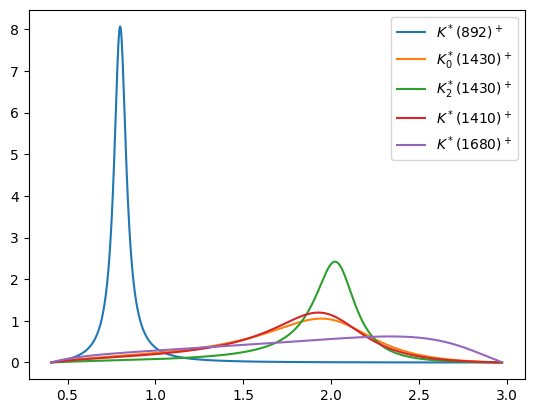

In [10]:
xpl = np.linspace(np.min(phsp.m2ab(norm_sample)), np.max(phsp.m2ab(norm_sample)), 1000)
ykst = atfd.density(atfd.breit_wigner_lineshape(xpl, mkst, wkst, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
yk0st1430 = atfd.density(atfd.breit_wigner_lineshape(xpl, mk0st1430, wk0st1430, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
yk2st1430 = atfd.density(atfd.breit_wigner_lineshape(xpl, mk2st1430, wk2st1430, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
ykst1410 = atfd.density(atfd.breit_wigner_lineshape(xpl, mkst1410, wkst1410, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
ykst1680 = atfd.density(atfd.breit_wigner_lineshape(xpl, mkst1680, wkst1680, masses_ab[0], masses_ab[1], masses_ab[2], md, rd, rr, 1, 1))
int_kst = trapezoid(ykst, xpl)
int_k0st1430 = trapezoid(yk0st1430, xpl)
int_k2st1430 = trapezoid(yk2st1430, xpl)
int_kst1410 = trapezoid(ykst1410, xpl)
int_kst1680 = trapezoid(ykst1680, xpl)
plt.plot(xpl, ykst / int_kst, label=r'$K^*(892)^+$')
plt.plot(xpl, yk0st1430 / int_k0st1430, label=r'$K_0^*(1430)^+$')
plt.plot(xpl, yk2st1430 / int_k2st1430, label=r'$K_2^*(1430)^+$')
plt.plot(xpl, ykst1410 / int_kst1410, label=r'$K^*(1410)^+$')
plt.plot(xpl, ykst1680 / int_kst1680, label=r'$K^*(1680)^+$')
plt.legend()

There is a problem in the relativistic breit wigner lineshape at low masses. FIXED: order of particles in `phsp` and `masses` were different.

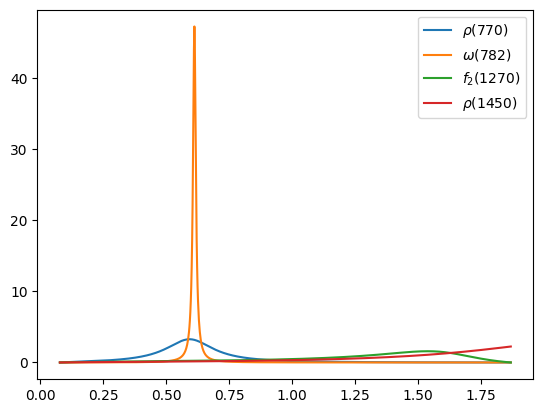

In [11]:
xpl = np.linspace(np.min(phsp.m2ac(norm_sample)), np.max(phsp.m2ac(norm_sample)), 1000)
yrho = atfd.density(atfd.breit_wigner_lineshape(xpl, mrho, wrho, masses_ac[0], masses_ac[1], masses_ac[2], md, rd, rr, 1, 1))
yomega = atfd.density(atfd.breit_wigner_lineshape(xpl, momega, womega, *masses_ac, md, rd, rr, 1, 1))
yf2_1270 = atfd.density(atfd.breit_wigner_lineshape(xpl, mf2_1270, wf2_1270, *masses_ac, md, rd, rr, 1, 1))
yrho1450 = atfd.density(atfd.breit_wigner_lineshape(xpl, mrho1450, wrho1450, *masses_ac, md, rd, rr, 1, 1, md0=mrho1450+masses_ac[2]))
int_rho = trapezoid(yrho, xpl)
int_omega = trapezoid(yomega, xpl)
int_f2_1270 = trapezoid(yf2_1270, xpl)
int_rho1450 = trapezoid(yrho1450, xpl)
plt.plot(xpl, yrho / int_rho, label=r'$\rho(770)$')
plt.plot(xpl, yomega / int_omega, label=r'$\omega(782)$')
plt.plot(xpl, yf2_1270 / int_f2_1270, label=r'$f_2(1270)$')
plt.plot(xpl, yrho1450 / int_rho1450, label=r'$\rho(1450)$')
plt.legend()

In [12]:
@atfi.function
def breit_wigner_lineshape_test(
    m2,
    m0,
    gamma0,
    ma,
    mb,
    mc,
    md,
    dr,
    dd,
    lr,
    ld,
    barrier_factor=True,
    ma0=None,
    md0=None,
):
    r"""Breit-Wigner amplitude with Blatt-Weisskopf form factors, mass-dependent width and orbital barriers

        .. math::

            BW(m^2) = \frac{1}{m_{res}^2 - m^2 - i m_{res} \Gamma(m, m_{res}, \Gamma_{res}, p, p_0, FF_r, l_r)} FF_r FF_d

            
        if barrier_factor is True, the orbital barrier factors are included in the form factor

        .. math::

            BW(m^2) = \frac{1}{m_{res}^2 - m^2 - i m_{res} \Gamma(m, m_{res}, \Gamma_{res}, p, p_0, FF_r, l_r)} FF_r FF_d B_r B_d

        
        where
            - :math:`\Gamma(m, m_{res}, \Gamma_{res}, p, p_0, FF_r, l_r)` is the mass-dependent width
            - :math:`FF_r = BWFF(p, p_0, d_r, l_r)` is the Blatt-Weisskopf form factor for the resonance
            - :math:`FF_d = BWFF(p, p_0, d_d, l_d)` is the Blatt-Weisskopf form factor for the decay
            - :math:`B_r = B_l(p, p_0, l_r)` is the orbital barrier factor for the resonance
            - :math:`B_d = B_l(q, q_0, l_d)` is the orbital barrier factor for the decay

    Args:
        m2 (float): invariant mass squared of the system
        m0 (float): resonance mass
        gamma0 (float): resonance width
        ma (float): mass of particle a
        mb (float): mass of particle b
        mc (float): mass of the other particle (particle c)
        md (float): mass of the decaying particle
        dr (float): barrier radius for the resonance
        dd (float): barrier radius for the decay
        lr (int): orbital angular momentum of the resonance
        ld (int): orbital angular momentum of the decay
        barrier_factor (bool, optional): multiplies the form factor for the barrier factors. Defaults to True.
        ma0 (float, optional): alternative value for the mass of the decaying particle to calculate the momentum of the system assuming the resonance mass. Defaults to None.
        md0 (float, optional): alternative value for the mass of the decaying particle to calculate the q-value of the system assuming the resonance mass. Defaults to None.

    Returns:
        complex: the Breit-Wigner amplitude
    """
    m = atfi.sqrt(m2)
    q = atfk.two_body_momentum(md, m, mc)
    q0 = atfk.two_body_momentum(md if md0 is None else md0, m0, mc)
    # if q0 == 0:
    #     q0 = atfk.complex_two_body_momentum(md if md0 is None else md0, m0, mc)
    p = atfk.two_body_momentum(m, ma, mb)
    p0 = atfk.two_body_momentum(m0, ma if ma0 is None else ma0, mb)
    print(m.numpy(), q.numpy(), q0.numpy(), p.numpy(), p0.numpy())
    ffr = atfd.blatt_weisskopf_ff(p, p0, dr, lr)
    ffd = atfd.blatt_weisskopf_ff(q, q0, dd, ld)
    print(ffr.numpy(), ffd.numpy())
    width = atfd.mass_dependent_width(m, m0, gamma0, p, p0, ffr, lr)
    bw = atfd.relativistic_breit_wigner(m2, m0, width)
    print(width.numpy(), bw.numpy())
    ff = ffr * ffd
    if barrier_factor:
        b1 = atfd.orbital_barrier_factor(p, p0, lr)
        b2 = atfd.orbital_barrier_factor(q, q0, ld) if q0 != 0 else atfi.const(1.0)
        ff *= b1 * b2
        print(b1.numpy(), b2.numpy())
    return bw * atfi.complex(ff, atfi.const(0.0))

## LASS


In [13]:
def LASS(m2ab, a, r, m0, gamma0, md, mc, amp_res, amp_nr, phase_res, phase_nr, cutOff=0):
    q0 = atfk.two_body_momentum(md, m0, mc)
    q = atfk.two_body_momentum(md, atfi.sqrt(m2ab), mc)
    cot_delta_beta = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    nr  = atfd.nonresonant_lass_lineshape(m2ab, a, r, md, mc)
    res = atfd.resonant_lass_lineshape(m2ab, m0, gamma0, a, r, md, mc)
    lass = atfi.cast_complex(amp_res) * atfi.complex( atfi.cos(phase_res), atfi.sin(phase_res) ) * \
             atfi.complex( q * cot_delta_beta, q ) / atfi.complex( q * cot_delta_beta, -q ) * res
    lass += atfi.cast_complex(amp_nr) * atfi.complex( atfi.cos(phase_nr), atfi.sin(phase_nr) ) * \
            atfi.cast_complex( atfi.cos(phase_nr) + atfi.sin(phase_nr) * cot_delta_beta ) * nr
    # lass += atfi.where( m2ab>cutOff,
    #             atfi.cast_complex(amp_nr) * atfi.complex( atfi.cos(phase_nr), atfi.sin(phase_nr) ) * \
    #            atfi.cast_complex( atfi.cos(phase_nr) + atfi.sin(phase_nr) * cot_delta_beta ) * nr,
    #                atfi.cast_complex(0.0))  # Default value if condition is false
    return lass

def LASSalt(m2ab, a, r, m0, gamma0, md, mc, amp_res, amp_nr, phase_res, phase_nr):
    q = atfk.two_body_momentum(md, atfi.sqrt(m2ab), mc)
    cot_delta_beta = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    nr  = atfd.nonresonant_lass_lineshape(m2ab, a, r, md, mc)
    res = atfd.resonant_lass_lineshape(m2ab, m0, gamma0, a, r, md, mc)
    lass =  atfi.cast_complex(amp_nr) * atfi.complex( atfi.cos(phase_nr), atfi.sin(phase_nr) ) * \
               atfi.cast_complex( atfi.cos(phase_nr) + atfi.sin(phase_nr) * cot_delta_beta ) * nr
    lass += atfi.cast_complex(amp_res) * atfi.complex( atfi.cos(phase_res), atfi.sin(phase_res) ) * \
             atfi.complex( q * cot_delta_beta, q ) / atfi.complex( q * cot_delta_beta, -q ) * res
    return lass

In [14]:
lass_M = atfi.const(1.4617)
lass_G = atfi.const(0.2683)
lass_F = atfi.const(0.4524)
lass_phiF = atfi.const(0.248)
lass_R = atfi.const(1.0)
lass_phiR = atfi.const(2.495)
lass_a = atfi.const(0.172)
lass_r = atfi.const(-20.6)

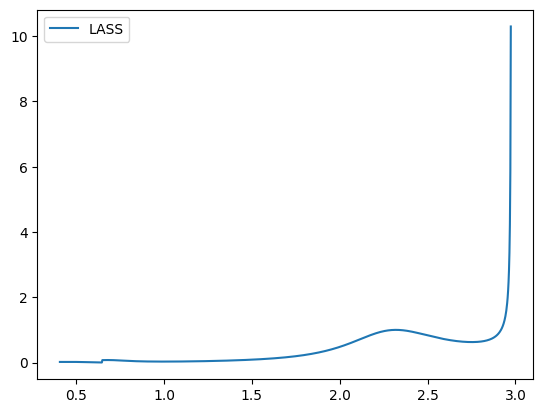

In [15]:
xpl = np.linspace(np.min(phsp.m2ab(norm_sample)), np.max(phsp.m2ab(norm_sample)), 1000)
pab = atfk.two_body_momentum(atfi.sqrt(xpl), masses_ab[0], masses_ab[1])
delta_beta = atfi.atan( 1.0 / ( 1.0 / lass_a / pab + 0.5 * lass_r * pab ) )
ylass = atfd.density(LASS(xpl, lass_a, lass_r, lass_M, lass_G, md, masses_ab[2], lass_R, lass_F, lass_phiR, lass_phiF, 0.5))
ylass_alt = atfd.density(LASSalt(xpl, lass_a, lass_r, lass_M, lass_G, md, masses_ab[2], lass_R, lass_F, lass_phiR, lass_phiF))
nr = atfd.nonresonant_lass_lineshape(xpl, lass_a, lass_r, md, masses_ab[2])
ylass_nr = atfd.density(atfi.cast_complex(lass_F) * atfi.complex( atfi.cos(lass_phiF), atfi.sin(lass_phiF) ) * nr)
ylass_nr_jordi = atfd.density(atfi.cast_complex(lass_F) * atfi.complex( atfi.cos(lass_phiF), atfi.sin(lass_phiF) ) * \
                        atfi.cast_complex( atfi.cos(lass_phiF) + atfi.sin(lass_phiF) / atfi.tan(delta_beta) ) * nr)
ylass_res = atfd.density(atfd.resonant_lass_lineshape(xpl, lass_M, lass_G, lass_a, lass_r, md, masses_ab[2]))
#yomega = atfd.density(atfd.breit_wigner_lineshape(xpl, momega, womega, *masses_ac, md, rd, rr, 1, 1))
int_lass = trapezoid(ylass, xpl)
int_lass_alt = trapezoid(ylass_alt, xpl)
int_lass_nr = trapezoid(ylass_nr, xpl)
int_lass_nr_jordi = trapezoid(ylass_nr_jordi, xpl)
int_lass_res = trapezoid(ylass_res, xpl)
#int_omega = trapezoid(yomega, xpl)
#int_f2_1270 = trapezoid(yf2_1270, xpl)
#int_rho1450 = trapezoid(yrho1450, xpl)
plt.plot(xpl, ylass / int_lass, label=r'LASS')
# plt.plot(xpl, ylass_alt / int_lass_alt, label=r'LASS alt')
#plt.plot(xpl, ylass_nr / int_lass_nr, label=r'LASS NR')
#plt.plot(xpl, ylass_res / int_lass_res, label=r'LASS Res')
# plt.plot(xpl, yomega / int_omega, label=r'$\omega(782)$')
# plt.plot(xpl, yf2_1270 / int_f2_1270, label=r'$f_2(1270)$')
# plt.plot(xpl, yrho1450 / int_rho1450, label=r'$\rho(1450)$')
plt.legend()

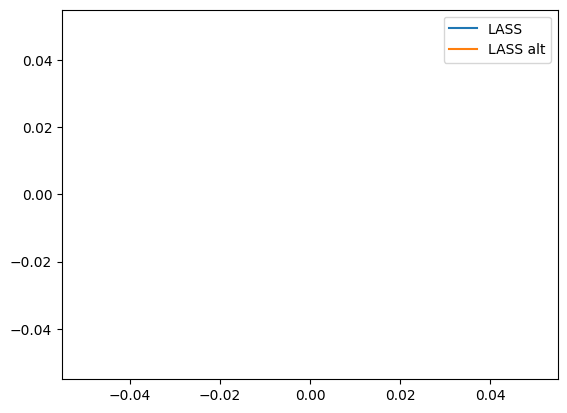

In [16]:
xpl2 = np.linspace(masses_ab[0]+masses_ab[1], md-masses_ab[2], 1000)
xpl2sq = np.power(xpl2,2)
pab = atfk.two_body_momentum(xpl2, masses_ab[0], masses_ab[1])
delta_beta = atfi.atan( 1.0 / ( 1.0 / lass_a / pab + 0.5 * lass_r * pab ) )
ylass = atfd.density(LASS(xpl2sq, lass_a, lass_r, lass_M, lass_G, masses_ab[0], masses_ab[1], lass_R, lass_F, lass_phiR, lass_phiF, 0.5))
ylass_alt = atfd.density(LASSalt(xpl2sq, lass_a, lass_r, lass_M, lass_G, md, masses_ab[2], lass_R, lass_F, lass_phiR, lass_phiF))
#nr = atfd.nonresonant_lass_lineshape(xpl, lass_a, lass_r, masses_ab[0], masses_ab[1])
#ylass_nr = atfd.density(atfi.cast_complex(lass_F) * atfi.complex( atfi.cos(lass_phiF), atfi.sin(lass_phiF) ) * nr)
#ylass_nr_jordi = atfd.density(atfi.cast_complex(lass_F) * atfi.complex( atfi.cos(lass_phiF), atfi.sin(lass_phiF) ) * \
#                        atfi.cast_complex( atfi.cos(lass_phiF) + atfi.sin(lass_phiF) / atfi.tan(delta_beta) ) * nr)
#ylass_res = atfd.density(atfd.resonant_lass_lineshape(xpl, lass_M, lass_G, lass_a, lass_r, masses_ab[0], masses_ab[1], True))
#yomega = atfd.density(atfd.breit_wigner_lineshape(xpl, momega, womega, *masses_ac, md, rd, rr, 1, 1))
int_lass = trapezoid(ylass, xpl2sq)
int_lass_alt = trapezoid(ylass_alt, xpl2sq)
#int_lass_nr = trapezoid(ylass_nr, xpl)
#int_lass_nr_jordi = trapezoid(ylass_nr_jordi, xpl)
#int_lass_res = trapezoid(ylass_res, xpl)
#int_omega = trapezoid(yomega, xpl)
#int_f2_1270 = trapezoid(yf2_1270, xpl)
#int_rho1450 = trapezoid(yrho1450, xpl)
plt.plot(xpl2, ylass / int_lass, label=r'LASS')
plt.plot(xpl2, ylass_alt / int_lass_alt, label=r'LASS alt')
#plt.plot(xpl, ylass_nr / int_lass_nr, label=r'LASS NR')
#plt.plot(xpl, ylass_res / int_lass_res, label=r'LASS Res')
# plt.plot(xpl, yomega / int_omega, label=r'$\omega(782)$')
# plt.plot(xpl, yf2_1270 / int_f2_1270, label=r'$f_2(1270)$')
# plt.plot(xpl, yrho1450 / int_rho1450, label=r'$\rho(1450)$')
plt.legend()

In [17]:
print(xpl2)
print(np.power(xpl2,2))
print(xpl)


[0.63718139 0.63827057 0.63935974 0.64044892 0.6415381  0.64262728
 0.64371645 0.64480563 0.64589481 0.64698399 0.64807316 0.64916234
 0.65025152 0.6513407  0.65242987 0.65351905 0.65460823 0.65569741
 0.65678658 0.65787576 0.65896494 0.66005412 0.66114329 0.66223247
 0.66332165 0.66441082 0.6655     0.66658918 0.66767836 0.66876753
 0.66985671 0.67094589 0.67203507 0.67312424 0.67421342 0.6753026
 0.67639178 0.67748095 0.67857013 0.67965931 0.68074849 0.68183766
 0.68292684 0.68401602 0.6851052  0.68619437 0.68728355 0.68837273
 0.68946191 0.69055108 0.69164026 0.69272944 0.69381861 0.69490779
 0.69599697 0.69708615 0.69817532 0.6992645  0.70035368 0.70144286
 0.70253203 0.70362121 0.70471039 0.70579957 0.70688874 0.70797792
 0.7090671  0.71015628 0.71124545 0.71233463 0.71342381 0.71451299
 0.71560216 0.71669134 0.71778052 0.71886969 0.71995887 0.72104805
 0.72213723 0.7232264  0.72431558 0.72540476 0.72649394 0.72758311
 0.72867229 0.72976147 0.73085065 0.73193982 0.733029   0.73411

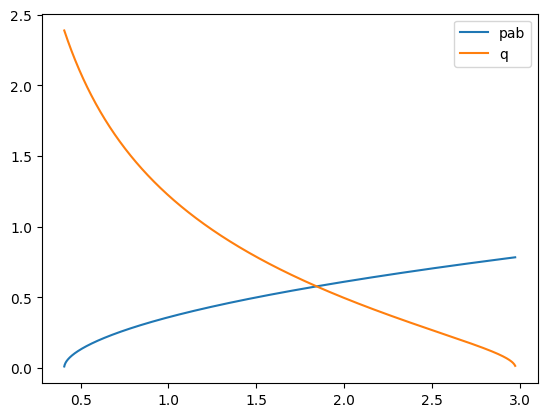

In [18]:
pab = atfk.two_body_momentum(atfi.sqrt(xpl), masses_ab[0], masses_ab[1])
q = atfk.two_body_momentum(atfi.sqrt(xpl), md, masses_ab[2])
plt.plot(xpl, pab, label='pab')
plt.plot(xpl, q, label='q')
plt.legend()
plt.show()

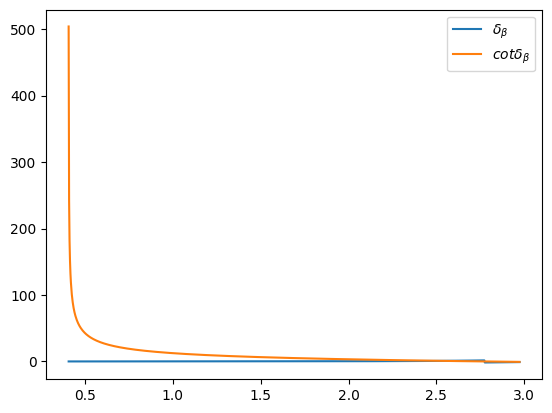

In [19]:
q_lass = atfk.two_body_momentum(atfi.sqrt(xpl), masses_ab[0], masses_ab[1])
delta_beta = atfi.atan( 1.0 / ( 1.0 / lass_a / q_lass + 0.5 * lass_r * q_lass ) )
cotdb = 1.0 / ( lass_a * q_lass) + 0.5*lass_r*q_lass 
plt.plot(xpl, delta_beta, label=r'$\delta_{\beta}$')
plt.plot(xpl, cotdb, label=r'$cot\delta_{\beta}$')
#plt.plot(xpl, 1./cotdb, label=r'$tan\delta_{\beta}$')
plt.legend()

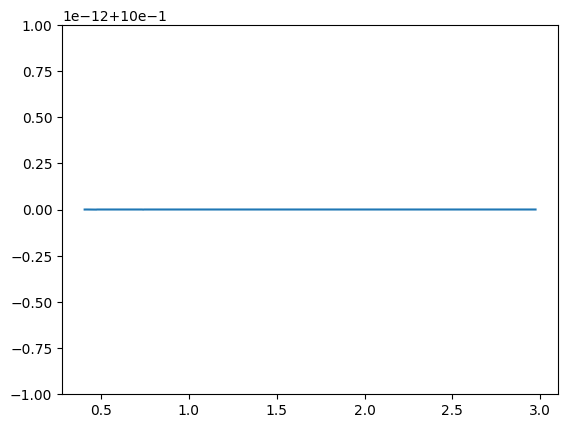

In [20]:
plt.plot(xpl, atfd.density(atfi.complex( q_lass * cotdb, q_lass ) / atfi.complex( q_lass * cotdb, -q_lass )))

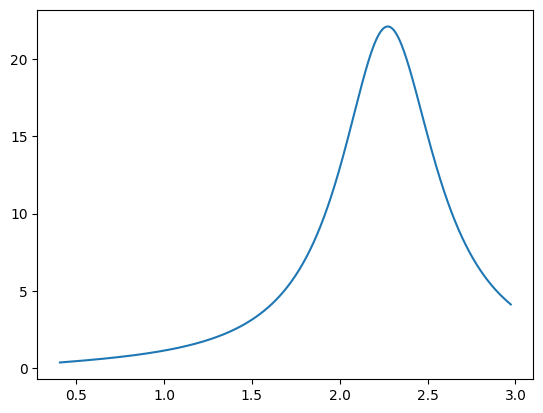

In [21]:

res = atfd.resonant_lass_lineshape(xpl, lass_M, lass_G, lass_a, lass_r, md, masses_ab[2])
lass = atfi.cast_complex(lass_R) * atfi.complex( atfi.cos(lass_phiR), atfi.sin(lass_phiR) ) * \
             atfi.complex( q_lass * cotdb, q_lass ) / atfi.complex( q_lass * cotdb, -q_lass ) * res
plt.plot(xpl, atfd.density(lass))

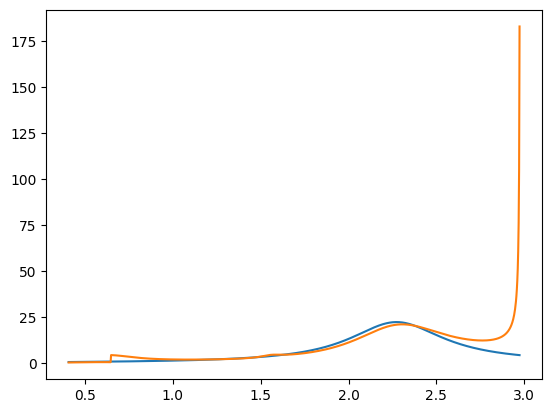

In [22]:
def LASS(m2ab, a, r, m0, gamma0, ma, mb, amp_res, amp_nr, phase_res, phase_nr, cutOff=0):
    q0 = atfk.two_body_momentum(m0, ma, mb)
    q = atfk.two_body_momentum(atfi.sqrt(m2ab), ma, mb)
    cot_delta_beta = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    nr  = atfd.nonresonant_lass_lineshape(m2ab, a, r, ma, mb)
    res = atfd.resonant_lass_lineshape(m2ab, m0, gamma0, a, r, ma, mb)
    lass = atfi.cast_complex(amp_res) * atfi.complex( atfi.cos(phase_res), atfi.sin(phase_res) ) * \
             atfi.complex( q * cot_delta_beta, q ) / atfi.complex( q * cot_delta_beta, -q ) * res
    lass += atfi.cast_complex(amp_nr) * atfi.complex( atfi.cos(phase_nr), atfi.sin(phase_nr) ) * \
            atfi.cast_complex( atfi.cos(phase_nr) + atfi.sin(phase_nr) * cot_delta_beta ) * nr
    # lass += atfi.where( m2ab>cutOff,
    #             atfi.cast_complex(amp_nr) * atfi.complex( atfi.cos(phase_nr), atfi.sin(phase_nr) ) * \
    #            atfi.cast_complex( atfi.cos(phase_nr) + atfi.sin(phase_nr) * cot_delta_beta ) * nr,
    #                atfi.cast_complex(0.0))  # Default value if condition is false
    return lass
plt.plot(xpl, atfd.density(atfd.resonant_lass_lineshape(xpl, lass_M, lass_G, lass_a, lass_r, md, masses_ab[2])))
plt.plot(xpl, atfd.density(LASS( xpl, lass_a, lass_r, lass_M, lass_G, md, masses_ab[2], lass_R, lass_F, lass_phiR, lass_phiF, 0.5)))

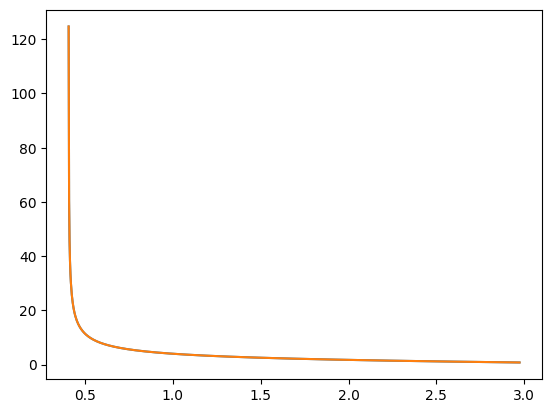

In [23]:
plt.plot(xpl, atfi.cos(lass_phiF) + atfi.sin(lass_phiF) / atfi.tan(delta_beta) )
plt.plot(xpl, atfi.cos(lass_phiF) + atfi.sin(lass_phiF) / (1.0 / ( 1.0 / lass_a / pab + 0.5 * lass_r * pab )  ))


Problem is due to this divergence at low masses!

## Laura++ Model

Laura++ model seems the same as what AmpliTF uses, let's try to code it here in any case:

$$
T(m) = \frac{m}{q\cot\delta_b - iq}+ e^{i\delta_b}\frac{m_0\Gamma_0\frac{m_0}{q_0}}{m_0^2 - m^2 -i m_0\Gamma_0 \frac{q}{m}\frac{m_0}{q_0}}
$$

with

$$
\cot\delta_b = \frac{1}{aq} + \frac{rq}{2}
$$

In [24]:
@atfi.function
def LauraLASS(m, md, mc, a, r, m0, g0):
    q0 = atfk.two_body_momentum(md, m0, mc)
    q = atfk.two_body_momentum(md, m, mc)
    cot_delta_beta = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    delta_beta = atfi.atan(1.0 / cot_delta_beta)
    Tm = atfi.cast_complex(m) / atfi.complex(q * cot_delta_beta, -q)
    Tm+= atfi.complex(atfi.cos(delta_beta), atfi.sin(delta_beta)) * \
         atfi.cast_complex(m0 * g0 * m0 / q0) * \
         tf.math.reciprocal(atfi.complex(m0*m0 - m*m, - m0 * g0 * q / m * m0 / q0 ))
    return Tm

B->etacKπ parameters

In [25]:
r = atfi.const(2.07)
a = atfi.const(3.32)
mkzst_1430 = atfi.const(1.425)
gkzst_1430 = atfi.const(0.270)

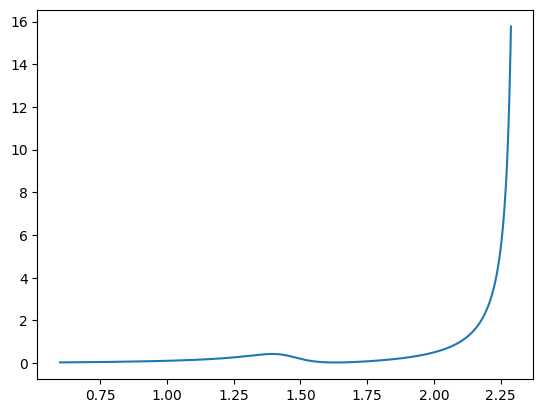

In [26]:
mb = 5.28
metac = 2.99
xpl = np.linspace(0.6,mb-metac,1000)
LLass = atfd.density(LauraLASS(xpl, mb, metac, a, r, mkzst_1430, gkzst_1430))
is_nan = np.isnan(LLass)
LLass_int = trapezoid(LLass[~is_nan], xpl[~is_nan])
plt.plot(xpl[~is_nan], LLass[~is_nan]/LLass_int)

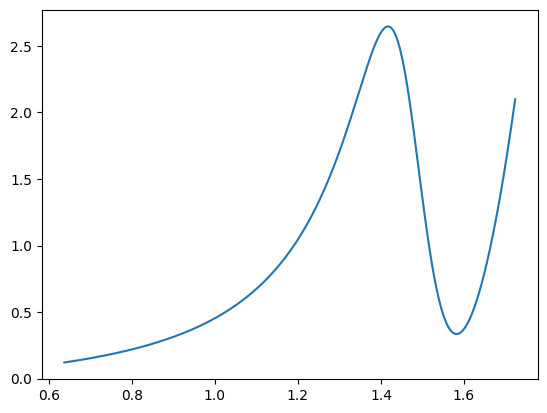

In [27]:
md = 1.864
mpi = 0.13957
mkz = 0.497611
xpl = np.linspace(mkz+mpi,md-mpi,1000)
LLass = atfd.density(LauraLASS(xpl, md, mpi, a, r, mkzst_1430, gkzst_1430))
is_nan = np.isnan(LLass)
LLass_int = trapezoid(LLass[~is_nan], xpl[~is_nan])
plt.plot(xpl[~is_nan], LLass[~is_nan]/LLass_int)

In [28]:
@atfi.function
def my_relativistic_breit_wigner(m2, mres, wres):
    if wres.dtype is atfi.ctype():
        return tf.math.reciprocal(
            atfi.cast_complex(mres * mres - m2)
            - atfi.complex(atfi.const(0.0), mres) * wres
        )
    if wres.dtype is atfi.fptype():
        return tf.math.reciprocal(atfi.complex(mres * mres - m2, -mres * wres))
    return None

@atfi.function
def my_resonant_lass_lineshape(m2, m0, gamma0, a, r, md, mc):
    m = atfi.sqrt(m2)
    q = atfk.two_body_momentum(md, m, mc)
    q0 = atfk.two_body_momentum(md, m0, mc)
    cot_deltab = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    phase = atfi.atan(1.0 / cot_deltab)
    cot_delta_beta = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    delta_beta = atfi.atan(1.0 / cot_delta_beta)
    width = gamma0 * q / m * m0 / q0
    ampl = (tf.math.reciprocal(atfi.complex(m0*m0 - m2, - m0 * gamma0 * q / m * m0 / q0 )) * #my_relativistic_breit_wigner(m2, m0, width) *
            atfi.complex(atfi.cos(phase), atfi.sin(phase)) *
            atfi.cast_complex(m0* m0 * gamma0 / q0))
    return ampl

@atfi.function
def LauraLASSatfd(m, md, mc, a, r, m0, g0):
    m2 = atfi.pow(m,2)
    q0 = atfk.two_body_momentum(md, m0, mc)
    q = atfk.two_body_momentum(md, m, mc)
    cot_delta_beta = atfi.const(1.0) / a / q + atfi.const(0.5) * r * q
    delta_beta = atfi.atan(1.0 / cot_delta_beta)
    Tm = atfd.nonresonant_lass_lineshape(m2, a, r, md, mc)
    #Tm = atfi.cast_complex(m) / atfi.complex(q * cot_delta_beta, -q)
    # Tm+= atfi.complex(atfi.cos(delta_beta), atfi.sin(delta_beta)) * \
    #      atfi.cast_complex(m0 * g0 * m0 / q0) * \
    #      tf.math.reciprocal(atfi.complex(m0*m0 - m2, - m0 * g0 * q / m * m0 / q0 ))

    # width = gamma0 * q / m * m0 / q0
    # ampl = (relativistic_breit_wigner(m2ab, m0, width) *
    #         atfi.complex(atfi.cos(phase), atfi.sin(phase)) *
    #         atfi.cast_complex(m2ab * gamma0 / q0))
    # tf.math.reciprocal(atfi.complex(mres * mres - m2, -mres * wres))


    Tm+=  atfd.resonant_lass_lineshape(m2, m0, g0, a, r, md, mc)
    return Tm

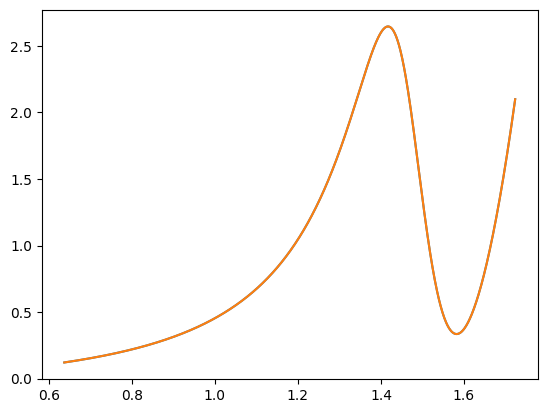

In [29]:
md = atfi.const(1.864)
mpi = atfi.const(0.13957)
mkz = atfi.const(0.497611)
xpl = np.linspace(mkz+mpi,md-mpi,1000)
LLass = atfd.density(LauraLASS(xpl, md, mpi, a, r, mkzst_1430, gkzst_1430))
is_nan = np.isnan(LLass)
LLass_int = trapezoid(LLass[~is_nan], xpl[~is_nan])
plt.plot(xpl[~is_nan], LLass[~is_nan]/LLass_int)
LLassA = atfd.density(LauraLASSatfd(xpl, md, mpi, a, r, mkzst_1430, gkzst_1430))
LLass_int = trapezoid(LLassA[~is_nan], xpl[~is_nan])
plt.plot(xpl[~is_nan], LLassA[~is_nan]/LLass_int)

## K-Matrix

$$
K_{ij}(m) = f(m) \left( \sum_{\alpha} \frac{g_{\alpha i}g_{\alpha j}}{m_{\alpha}^2-m^2} + f_{ij}^{\text{scat}} \frac{1 GeV^2 - s_0^{\text{scat}}}{m^2 - s_0^{\text{scat}}} \right)
$$

Poles:

| $\alpha$ | Name | Mass (MeV) |
|----------|------|------------|
| 0        | $f_0(980)$ |  651 |
| 1        | $f_0(1300)$ |  1203.6 |
| 2        | $f_0(1500)$ |  1558.17 |
| 3        | $f_0(1200-1600)$ |  1210 |
| 4        | $f_0(1750)$ |  1822.06 |

Channels:

| $i,j$ | Particles |
|--------|-----------|
| 0    | $\pi\pi$ |
| 1    | $KK$ |
| 2    | $\pi\pi\pi\pi$ |
| 3    | $\eta\eta$ |
| 4    | $\eta\eta^{\prime}$ |

In [87]:
@atfi.function
def AdlerZero(m2, ma, sA0 = atfi.const(-0.15), sA = atfi.const(1.0)):
    r"""Suppress the non-physical singularity below the ππ threshold (Adler zero)

    .. math::

        f(m) = \frac{1 GeV^2 - s_{A0}}{m^2 - s_{A0}} \left(m^2 - s_A\frac{m^2_{\pi}}{2} \right)

    Args:
        m (float): invariant mass squared of the system
        ma (float): pion mass
        sA0 (float, optional): _description_. Defaults to atfi.const(-0.15).
        sA (float, optional): _description_. Defaults to atfi.const(1.0).

    Returns:
        float: suppression factor
    """
    azero = ( atfi.const(1.0) - sA0 ) / (m2 - sA0) * \
        (m2 - atfi.const(0.5) * sA * ma * ma)
    return azero

@atfi.function
def KM_res(m2, m_poles, g_poles):
    r"""
    Calculates the sum of resonances: 
    
    .. math::
        
        \sum_{\alpha} \frac{g_{\alpha i}g_{\alpha j}}{m_{\alpha}^2-m^2}$

    Args:
        m2: squared mass of the system (:math:`m^2`)
        m_poles (Tensor): array of pole masses (:math:`m_{\alpha}`)
        g_poles (Tensor): coupling constants (:math:`g_{\alpha i}`)

    Returns:
        Tensor: result of the sum for each pair of poles
    """
    m2 = tf.convert_to_tensor(m2, dtype=m_poles.dtype)
    # If m2 is scalar, expand it to shape [1]
    m2 = tf.reshape(m2, [-1])
    denominators = atfi.pow(m_poles,2) - tf.expand_dims(m2, axis=-1)  # add one dimension for broadcasting
    numerators = tf.einsum('ai,aj->aij', g_poles, g_poles)
    inv_denominators = tf.math.reciprocal(denominators)
    result = tf.einsum('ka,aij->kij',inv_denominators, numerators )
    return result

@atfi.function
def KM_nonres(m2, s0, fij):
    r"""
    Calculates the non-resonant part of the K-Matrix amplitude:
    
    .. math::

        f_{ij}^{\text{scat}} \frac{1 GeV^2 - s_0^{\text{scat}}}{m^2 - s_0^{\text{scat}}}
    
    Args:
        m2: squared mass of the system (:math:`m^2`)
        s0 (float): scattering parameter (:math:`s_0^{scat}`)
        fij (Tensor): non resonant coupling constants (:math:`f_{ij}`)

    Returns:
        Tensor: result of the sum for each pair of poles    
    """
    sfactor = (atfi.const(1.0) - s0) / (m2 - s0)
    result = tf.einsum('k,ij->kij', sfactor, fij)
    return result

@atfi.function
def KM_phsp_twobody(m2, ma, mb):
    r"""Calculates the phase space factor for the K-matrix in the case of two-body pole

    .. math::
        \sqrt{1 - \frac{(m_a + m_b)^2}{m^2}}

    Args:
        m2 (float): the invariant mass squared of the system
        ma (float): the mass of particle a
        mb (float): the mass of particle b

    Returns:
        complex: the phase space factor
    """
    result = atfi.sqrt( atfi.cast_complex((atfi.const(1.0) - atfi.pow(ma+mb,2)/m2) * (atfi.const(1.0) - atfi.pow(ma-mb,2)/m2)) )
    return result

@atfi.function
def KM_phsp_fourbody(m2, ma):
    r"""Calculates the phase space factor for the K-matrix in the case of two-body pole

    .. math::

        \rho(m) = \begin{cases}
                \sqrt{\frac{m^2-(4m_a^2)}{m^2}}, & \text{if }m\greq 1 GeV \\
                0.0005-0.0193m^2+0.1385m^4-0.2084m^6-0.2974m^8+0.1366m^{10}+1.0789m^{12} & \text{if }m<1 GeV
                \end{cases}

    where the second case is an approximation of the phase space factor for 4-body decays:

    .. math::

        \rho(m) = \rho_0\int\frac{dm_1^2}{\pi}\int\frac{dm_2^2}{\pi}\frac{M_0^2 \Gamma(m_1)\Gamma(m_2)\sqrt{(m^2+m_1^2-m_2^2)^2-4m^2m_1^2}}{m^2[(M_0^2-m_1^2)^2 + M_0^2\Gamma^2(m_1)][(M_0^2-m_2^2)^2 + M_0^2\Gamma^2(m_2)]}

    Args:
        m2 (float): the invariant mass squared of the system
        ma (float): the mass of particle a
        mb (float): the mass of particle b

    Returns:
        complex: the phase space factor
    """
    result = tf.where(m2>1, atfi.sqrt( atfi.cast_complex((m2 - 16*ma*ma)/m2) ), 
                      atfi.cast_complex(0.0005- 0.0193*m2 + 0.1385*m2*m2 - 0.2084*m2*m2*m2 - \
                      0.2974*m2*m2*m2*m2 + 0.1366*m2*m2*m2*m2*m2 + 1.0789*m2*m2*m2*m2*m2*m2) )
    return result

@atfi.function
def KM_phsp(m2, masses):
    r"""Calculates the phase space factor for the K-matrix

    .. math::

        \sqrt{1 - \frac{(m_a + m_b)^2}{m^2}} \text{ or } \sqrt{1 - \frac{(m_a + m_b)^2}{m^2}} \text{ for 4-body decay}

    Args:
        m2 (float): invariant mass squared of the system
        masses (array): array of masses of the particles in the final state

    Returns:
        float: phase space factor
    """
    km_phsp = tf.stack([
        KM_phsp_twobody(m2, masses[0][0], masses[0][1]),
        KM_phsp_twobody(m2, masses[1][0], masses[1][1]),
        KM_phsp_fourbody(m2, masses[2][0]),
        KM_phsp_twobody(m2, masses[3][0], masses[3][1]),
        KM_phsp_twobody(m2, masses[4][0], masses[4][1])
    ], axis=1)
    return km_phsp

@atfi.function
def KM_Pvec_res(m2, m_poles, g_poles, b_poles):
    r"""Calculates the resonant part of the production vector

    .. math::

        \sum_{\alpha} \frac{\beta_{\alpha}g_{\alpha j}}{m_{\alpha}^2-m^2}$

    Args:
        m2 (float): invariant mass squared of the system
        m_poles (array): array of pole masses
        g_poles (array): matrix of coupling constants
        b_poles (array): array of production strength of the poles

    Returns:
        array: result of the sum of each poles
    """
    m2 = tf.convert_to_tensor(m2, dtype=m_poles.dtype)
    # If m2 is scalar, expand it to shape [1]
    m2 = tf.reshape(m2, [-1])
    denominators = atfi.pow(m_poles,2) - tf.expand_dims(m2, axis=-1)  # add one dimension for broadcasting
    print(b_poles, denominators)
    #numerators = tf.einsum('a,ai->ai', b_poles, g_poles)
    inv_denominators = tf.einsum('ka,a->ka', atfi.cast_complex(tf.math.reciprocal(denominators)), b_poles)
    result = tf.einsum('ka,ai->ki',inv_denominators, atfi.cast_complex(g_poles) )
    return result

@atfi.function
def KM_Pvec_nonres(m2, s0, fi):
    r"""Calculates the resonant part of the production vector

    .. math::

        f_{i}^{\text{prod}} \frac{1 GeV^2 - s_0^{\text{prod}}}{m^2 - s_0^{\text{prod}}}

    Args:
        m2 (float): invariant mass squared of the system
        s0 (float): scattering parameter for production vector (:math:`s_0^{prod}`)
        fi (Tensor): non resonant coupling constants for production vector (:math:`f_{i}`)

    Returns:
        array: result of the sum of each poles
    """
    sfactor = (atfi.const(1.0) - s0) / (m2 - s0)
    result = tf.einsum('k,i->ki', atfi.cast_complex(sfactor), fi)
    return result

@atfi.function
def KM(m2, m_poles, g_poles, s0, fij, b_poles, s0_prod, fi_prod, masses_poles, mth):
    r"""Calculates the K-matrix amplitude

    .. math::

        F_l = \sum_j \left( I - i K \rho\right)^{-1}_{lj} P_j

    where _I_ is the identity matrix, _K_ is the K-matrix amplitude, _P_ is the production vector and _rho_ is the phase space factor.
    Citation:
        - `I. J. R. Atchinson, Nucl.Phys.A 189 (1972) 417-423<https://doi.org/10.1016/0375-9474(72)90305-3>`_
        - `S. U. Chung et al., Annalen der Physik 507 (1995) 404<https://doi.org/10.1002/andp.19955070504>`_
        - `V. V. Anisovich and A. V. Sarantsev, Eur. Phys. J. A16 (2003) 229<https://arxiv.org/abs/hep-ph/0204328>`_

    Args:
        m2 (array): tensor of invariant mass squared of the system
        m_poles (array): array of the pole masses
        g_poles (array): array of the pole couplings
        s0 (float): scattering parameter (:math:`s_0^{scat}`)
        fij (array): non resonant coupling constants (:math:`f_{ij}`)
        b_poles (array): array of production strength of the poles
        s0_prod (float): scattering parameter for production vector (:math:`s_0^{prod}`)
        fi_prod (array): non resonant coupling constants for production vector (:math:`f_{i}`)
        masses_poles (array): array of masses of the particles in the final state
        mth (float): threshold value for the phase space factor

    Returns:
        array: array of the K-matrix amplitude for each pion channel
    """
    # K-matrix
    km = KM_res(m2, m_poles, g_poles) + KM_nonres(m2, s0, fij)
    km = tf.einsum( 'k,kij->kij', AdlerZero(m2, mth), km )
    # Production vector
    km_pvec = KM_Pvec_res(m2, m_poles, g_poles, b_poles) + KM_Pvec_nonres(m2, s0_prod, fi_prod)
    # Compute the operation I - i * rho * KM
    N = tf.eye(5, dtype=atfi.ctype()) - atfi.cast_complex(atfi.complex(0.0, 1.0)) * \
                tf.einsum('kij,kj->kij', atfi.cast_complex(K_tf), KM_phsp(m2, masses_poles ))
    invN = tf.linalg.solve(N, tf.eye(5, batch_shape=[N.shape[0]], dtype=atfi.ctype()))
    result = tf.einsum('kij,kj->ki', invN, km_pvec)
    return result


### Test individual components

In [31]:
meta = atfi.const(lp.eta.mass/1000.)
metap = atfi.const(lp.etap_958.mass/1000.)

In [32]:
m_poles = atfi.const([0.651, 1.2036, 1.55817, 1.21, 1.82206]) # GeV
g_poles = atfi.const([ [ 0.22889, -0.55377,  0.00000, -0.39899, -0.34639],
                       [ 0.94128,  0.55095,  0.00000,  0.39065,  0.31503],
                       [ 0.36856,  0.23888,  0.55639,  0.18340,  0.18681],
                       [ 0.33650,  0.40907,  0.85679,  0.19906, -0.00984],
                       [ 0.18171, -0.17558, -0.79658, -0.00355,  0.22358] ]) # GeV
fij = atfi.const([ [  0.23399,  0.15044, -0.20545,  0.32825,  0.35412],
                   [  0.15044, 0, 0, 0, 0],
                   [ -0.20545, 0, 0, 0, 0],
                   [  0.32825, 0, 0, 0, 0],
                   [  0.35412, 0, 0, 0, 0]])
s0=atfi.const(-3.92637)
b_poles = atfi.complex_from_polar(atfi.const([4.23, 10.90, 37.4, 14.7, 0.0]),atfi.const([164.0, 15.6, 3.3, -8.9, 0.0]))
fi_prod = atfi.complex(atfi.const([-4.724094278696236, -23.289333360304212, -1.860311896516422, -13.638752211193912, 0.0]), 
                       atfi.const([-6.511009103363590, -12.215597571354197, -32.982507366353126, -22.339804683783186, 0.0]))
s0_prod = atfi.const( -0.070000000000000)

In [33]:
xplsq = np.linspace(masses_ac[0]+masses_ac[1], md-masses_ac[2], 1000)

In [34]:
KM_res(0.77, m_poles, g_poles).shape

TensorShape([1, 5, 5])

In [35]:
KM_nonres(xplsq, s0, fij).shape

TensorShape([1000, 5, 5])

In [36]:
km = tf.einsum( 'k,kij->kij', AdlerZero(xplsq, mpi), (KM_res(xplsq, m_poles, g_poles) + KM_nonres(xplsq, s0, fij)) )
print(km.shape)

(1000, 5, 5)


(1000, 5, 5)


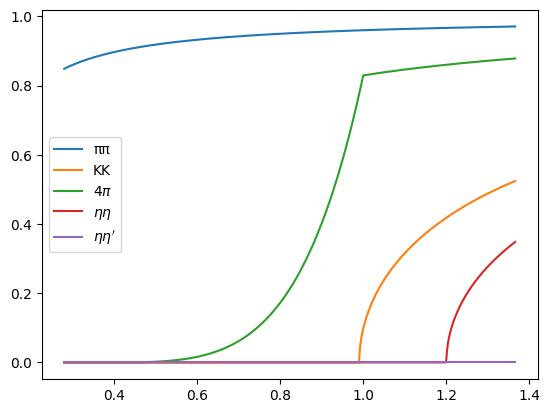

In [37]:
masses_poles = [[mpi,mpi], [mkz, mkz], [mpi], [meta, meta], [meta, metap]]
km_phsp = KM_phsp(xplsq, masses_poles )
#print(km_phsp)
plt.plot(xplsq, atfi.real(km_phsp[:, 0]), label='ππ')
plt.plot(xplsq, atfi.real(km_phsp[:, 1]), label='KK')
plt.plot(xplsq, atfi.real(km_phsp[:, 2]), label=r'$4\pi$')
plt.plot(xplsq, atfi.real(km_phsp[:, 3]), label=r'$\eta\eta$')
plt.plot(xplsq, atfi.real(km_phsp[:, 4]), label=r'$\eta\eta^\prime$')
plt.legend()
print(tf.einsum('ki,ij->kij',km_phsp , tf.eye(5, dtype=atfi.ctype())).shape)

In [38]:
KM_Pvec_res(xplsq, m_poles, g_poles, b_poles).shape

tf.Tensor(
[  3.39997019+2.51656565j -10.83653611+1.17451481j
 -36.93174339-5.89968896j -12.72189758-7.36500659j
   0.        +0.j        ], shape=(5,), dtype=complex128) tf.Tensor(
[[ 0.14466022  1.16951218  2.14875297  1.18495922  3.04076186]
 [ 0.14357188  1.16842384  2.14766463  1.18387088  3.03967353]
 [ 0.14248355  1.16733551  2.1465763   1.18278255  3.03858519]
 ...
 [-0.94041133  0.08444063  1.06368142  0.09988767  1.95569032]
 [-0.94149966  0.0833523   1.06259309  0.09879934  1.95460198]
 [-0.942588    0.08226396  1.06150475  0.097711    1.95351364]], shape=(1000, 5), dtype=float64)


TensorShape([1000, 5])

In [39]:
KM_Pvec_nonres(xplsq, s0_prod, fi_prod).shape

TensorShape([1000, 5])

In [40]:
KM_Pvec = KM_Pvec_res(xplsq, m_poles, g_poles, b_poles) + KM_Pvec_nonres(xplsq, s0_prod, fi_prod)

tf.Tensor(
[  3.39997019+2.51656565j -10.83653611+1.17451481j
 -36.93174339-5.89968896j -12.72189758-7.36500659j
   0.        +0.j        ], shape=(5,), dtype=complex128) tf.Tensor(
[[ 0.14466022  1.16951218  2.14875297  1.18495922  3.04076186]
 [ 0.14357188  1.16842384  2.14766463  1.18387088  3.03967353]
 [ 0.14248355  1.16733551  2.1465763   1.18278255  3.03858519]
 ...
 [-0.94041133  0.08444063  1.06368142  0.09988767  1.95569032]
 [-0.94149966  0.0833523   1.06259309  0.09879934  1.95460198]
 [-0.942588    0.08226396  1.06150475  0.097711    1.95351364]], shape=(1000, 5), dtype=float64)


Calculate the K-matrix

$$
F_i = \sum_j\left(I - i\rho K\right)^{-1}_{ij} P_j
$$

In [88]:
km  =KM(xplsq, m_poles, g_poles, s0, fij, b_poles, s0_prod, fi_prod, masses_poles, mpi)

tf.Tensor(
[-0.23346867 +3.11367501j  2.60502496-10.83103836j
 29.10426211 -1.56115666j -3.75205495 -5.46805462j
  0.         +0.j        ], shape=(5,), dtype=complex128) tf.Tensor(
[[ 0.14466022  1.16951218  2.14875297  1.18495922  3.04076186]
 [ 0.14357188  1.16842384  2.14766463  1.18387088  3.03967353]
 [ 0.14248355  1.16733551  2.1465763   1.18278255  3.03858519]
 ...
 [-0.94041133  0.08444063  1.06368142  0.09988767  1.95569032]
 [-0.94149966  0.0833523   1.06259309  0.09879934  1.95460198]
 [-0.942588    0.08226396  1.06150475  0.097711    1.95351364]], shape=(1000, 5), dtype=float64)


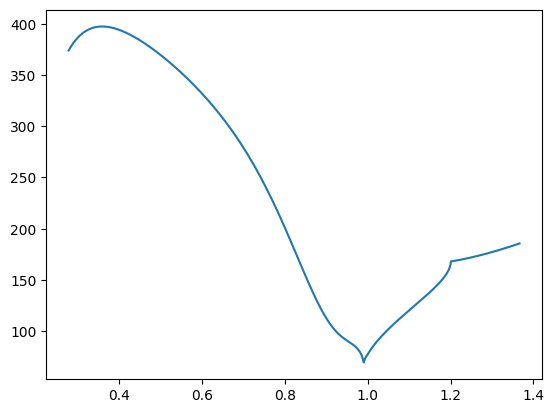

In [89]:
plt.plot(xplsq, atfd.density(km[:, 0]))

In [43]:
KM(xplsq[:1], m_poles, g_poles, s0, fij, b_poles, s0_prod, fi_prod, masses_poles, mpi)

tf.Tensor(
[  3.39997019+2.51656565j -10.83653611+1.17451481j
 -36.93174339-5.89968896j -12.72189758-7.36500659j
   0.        +0.j        ], shape=(5,), dtype=complex128) tf.Tensor([[0.14466022 1.16951218 2.14875297 1.18495922 3.04076186]], shape=(1, 5), dtype=float64)


<tf.Tensor: shape=(1, 5), dtype=complex128, numpy=
array([[ -5.41722782 -23.32181881j, -24.82578932 -12.59516187j,
        -24.43949869-107.93860606j, -22.42801798 -28.64999796j,
         -6.58523227  -2.86427183j]])>

In [44]:
import tensorflow as tf
g_poles = atfi.const( [ [0.22889, -0.55377, 0, -0.39899, -0.34639],
                        [0.94128, 0.55095, 0, 0.39065, 0.31503],
                        [0.36856, 0.23888, 0.55639, 0.18340, 0.18681],
                        [0.33650, 0.40907, 0.85679, 0.19906, -0.00984],
                        [0.18171, -0.17558, -0.79658, -0.00355, 0.22358]] )
m_poles = atfi.const( [0.651, 1.2036, 1.55817, 1.21, 1.82206] )
b_poles = atfi.complex_from_polar(atfi.const([3.122415682166643, 11.139907856904129, 29.146102368470210, 6.631556203215280, 0.0]),
								  atfi.const([7.928823290976309, 4.948420661321371, -0.053588781806890, -8.455370251307063, 0.0]))
fprod1 = atfi.complex_from_polar( atfi.const([-4.724094278696236, -23.289333360304212, -1.860311896516422, -13.638752211193912, 0.0]),
					  			  atfi.const([-6.511009103363590, -12.215597571354197, -32.982507366353126, -22.339804683783186, 0.0]))
fij = atfi.const([ [  0.23399,  0.15044, -0.20545,  0.32825,  0.35412],
                   [  0.15044, 0, 0, 0, 0],
                   [ -0.20545, 0, 0, 0, 0],
                   [  0.32825, 0, 0, 0, 0],
                   [  0.35412, 0, 0, 0, 0]])
K_matrix_sprod = atfi.const(-0.070000000000000)
#masses_poles = [[mpi,mpi], [mkz, mkz], [meta, meta], [meta, metap], [mpi]]

def Kmatrix_jordi(s, g, ma, beta, f_prod_1, fij, K_matrix_sprod, masses_poles):
	# Define variables
	#atfi.complex pole,SVT,Adler
	i = tf.zeros([5,5], dtype=atfi.ctype())
	#f = tf.zeros([5,5], dtype=atfi.fptype())
	# pi+, K+, eta, and eta' PDG masses
	mpi=atfi.const(0.13957)
	mK = atfi.const(0.493677)
	meta=atfi.const(0.54775)
	metap=atfi.const(0.95778)
	# Init matrices and vectors with zeros
	K = tf.zeros([5,5], dtype=atfi.ctype())
	# Fill scattering data values 
	s_scatt = atfi.const(-3.92637)
	sa = atfi.const(1.0)
	sa_0 = atfi.const(-0.15)
	# Compute phase space factors
	rho1sq=(atfi.const(1.0)-(atfi.pow((masses_poles[0][0]+masses_poles[0][1]),2)/s))
	rho1 = tf.where(rho1sq >= 0, 
                    atfi.complex(atfi.sqrt(rho1sq),atfi.const(0.0)), 
                    atfi.complex(atfi.const(0.0), tf.sqrt(-rho1sq)))
	#rho[0]=rho1
	#
	rho2sq=(atfi.const(1.0)-(tf.pow((masses_poles[1][0]+masses_poles[1][1]),2)/s))
	rho2 = tf.where(rho2sq >=0, 
                    atfi.complex(atfi.sqrt(rho2sq),atfi.const(0.0)), 
                    atfi.complex(atfi.const(0.0), tf.sqrt(-rho2sq)))
	#rho[1]=rho2
	#
	rho3=tf.where(s<=1,
			   atfi.complex(tf.sqrt(atfi.const(1.0)-(atfi.const(16.0)*masses_poles[2][0]*masses_poles[2][0]))*(
				   atfi.const(1.2274)+atfi.const(0.00370909)/(s*s) - atfi.const(0.111203)/(s) - \
					atfi.const(6.39017)*s +atfi.const(16.8358)*s*s - atfi.const(21.8845)*s*s*s + \
					atfi.const(11.3153)*s*s*s*s),atfi.const(0.0)),
               atfi.complex(tf.sqrt(atfi.const(1.0)-(atfi.const(16.0)*mpi*mpi/s)),atfi.const(0.0)))
	#rho[2]=rho3
    #
	rho4sq=(atfi.const(1.0)-(tf.pow((masses_poles[3][0]+masses_poles[3][1]),2)/s))
	rho4 = tf.where(rho4sq >=0, 
                    atfi.complex(atfi.sqrt(rho4sq),atfi.const(0.0)), 
                    atfi.complex(atfi.const(0.0), tf.sqrt(-rho4sq)))
	#rho[3]=rho4
	#
	rho5sq=(atfi.const(1.0)-(tf.pow((masses_poles[4][0]+masses_poles[4][1]),2)/s))
	rho5 = tf.where(rho5sq >=0, 
                    atfi.complex(atfi.sqrt(rho5sq),atfi.const(0.0)), 
                    atfi.complex(atfi.const(0.0), tf.sqrt(-rho5sq)))
	#rho[4]=rho5
	rho = tf.stack([rho1, rho2, rho3, rho4, rho5], axis=0)
	#print('RHO')
	#print(rho)
	# Sum over the poles
	#print('K sum #1')
	for k in range(5):
		for l in range(5):
			for pole_index in range(5):
				A=g[pole_index][k]*g[pole_index][l]
				B=ma[pole_index]*ma[pole_index]-s
				indices = [[k, l]]
				values = [K[k, l] + atfi.complex(A / B, atfi.const(0.0))]
				K = tf.tensor_scatter_nd_update(K, indices, values)
				#K[k][l]=K[k][l]+atfi.complex(A/B,atfi.const(0.0))
				#print(K[k][l])
	#
	#print('K sum #2')
	for k in range(5):
		for l in range(5):
			C = fij[k][l]*(atfi.const(1.0)-s_scatt)
			D = (s-s_scatt)
			indices = [[k, l]]
			values = [K[k, l] + atfi.complex(C / D, atfi.const(0.0))]
			K = tf.tensor_scatter_nd_update(K, indices, values)
			#print(K[k][l])
			#K[k][l]=K[k][l]+atfi.complex(C/D,atfi.const(0.0))
	#
	#print('K sum #3')
	for k in range(5):
		for l in range(5):
			E = (s-(sa*mpi*mpi*atfi.const(0.5)))*(atfi.const(1.0)-sa_0)
			F = (s-sa_0)
			indices = [[k, l]]
			values = [K[k, l]*atfi.complex(E / F, atfi.const(0.0))]
			K = tf.tensor_scatter_nd_update(K, indices, values)
			#print(K[k][l])
			#K[k][l]=K[k][l]*atfi.complex(E/F,atfi.const(0.0))
	#
	c10 = atfi.complex(atfi.const(1.0), atfi.const(0.0))
	c00 = atfi.complex(atfi.const(0.0), atfi.const(0.0))
	c01 = atfi.complex(atfi.const(0.0), atfi.const(1.0))
	n11=c10-c01*K[0][0]*rho[0]
	n12=c00-c01*K[0][1]*rho[1]
	n13=c00-c01*K[0][2]*rho[2]
	n14=c00-c01*K[0][3]*rho[3]
	n15=c00-c01*K[0][4]*rho[4]
	#
	n21=c00-c01*K[1][0]*rho[0]
	n22=c10-c01*K[1][1]*rho[1]
	n23=c00-c01*K[1][2]*rho[2]
	n24=c00-c01*K[1][3]*rho[3]
	n25=c00-c01*K[1][4]*rho[4]
	#
	n31=c00-c01*K[2][0]*rho[0]
	n32=c00-c01*K[2][1]*rho[1]
	n33=c10-c01*K[2][2]*rho[2]
	n34=c00-c01*K[2][3]*rho[3]
	n35=c00-c01*K[2][4]*rho[4]
	#
	n41=c00-c01*K[3][0]*rho[0]
	n42=c00-c01*K[3][1]*rho[1]
	n43=c00-c01*K[3][2]*rho[2]
	n44=c10-c01*K[3][3]*rho[3]
	n45=c00-c01*K[3][4]*rho[4]
	#
	n51=c00-c01*K[4][0]*rho[0]
	n52=c00-c01*K[4][1]*rho[1]
	n53=c00-c01*K[4][2]*rho[2]
	n54=c00-c01*K[4][3]*rho[3]
	n55=c10-c01*K[4][4]*rho[4]
	#
	# Compute the determinant
	det = (n15*n24*n33*n42*n51 - n14*n25*n33*n42*n51 - n15*n23*n34*n42*n51 +
			n13*n25*n34*n42*n51 + n14*n23*n35*n42*n51 - n13*n24*n35*n42*n51 -
			n15*n24*n32*n43*n51 + n14*n25*n32*n43*n51 + n15*n22*n34*n43*n51 -
			n12*n25*n34*n43*n51 - n14*n22*n35*n43*n51 + n12*n24*n35*n43*n51 +
			n15*n23*n32*n44*n51 - n13*n25*n32*n44*n51 - n15*n22*n33*n44*n51 +
			n12*n25*n33*n44*n51 + n13*n22*n35*n44*n51 - n12*n23*n35*n44*n51 -
			n14*n23*n32*n45*n51 + n13*n24*n32*n45*n51 + n14*n22*n33*n45*n51 -
			n12*n24*n33*n45*n51 - n13*n22*n34*n45*n51 + n12*n23*n34*n45*n51 -
			n15*n24*n33*n41*n52 + n14*n25*n33*n41*n52 + n15*n23*n34*n41*n52 -
			n13*n25*n34*n41*n52 - n14*n23*n35*n41*n52 + n13*n24*n35*n41*n52 +
			n15*n24*n31*n43*n52 - n14*n25*n31*n43*n52 - n15*n21*n34*n43*n52 +
			n11*n25*n34*n43*n52 + n14*n21*n35*n43*n52 - n11*n24*n35*n43*n52 -
			n15*n23*n31*n44*n52 + n13*n25*n31*n44*n52 + n15*n21*n33*n44*n52 -
			n11*n25*n33*n44*n52 - n13*n21*n35*n44*n52 + n11*n23*n35*n44*n52 +
			n14*n23*n31*n45*n52 - n13*n24*n31*n45*n52 - n14*n21*n33*n45*n52 +
			n11*n24*n33*n45*n52 + n13*n21*n34*n45*n52 - n11*n23*n34*n45*n52 +
			n15*n24*n32*n41*n53 - n14*n25*n32*n41*n53 - n15*n22*n34*n41*n53 +
			n12*n25*n34*n41*n53 + n14*n22*n35*n41*n53 - n12*n24*n35*n41*n53 -
			n15*n24*n31*n42*n53 + n14*n25*n31*n42*n53 + n15*n21*n34*n42*n53 -
			n11*n25*n34*n42*n53 - n14*n21*n35*n42*n53 + n11*n24*n35*n42*n53 +
			n15*n22*n31*n44*n53 - n12*n25*n31*n44*n53 - n15*n21*n32*n44*n53 +
			n11*n25*n32*n44*n53 + n12*n21*n35*n44*n53 - n11*n22*n35*n44*n53 -
			n14*n22*n31*n45*n53 + n12*n24*n31*n45*n53 + n14*n21*n32*n45*n53 -
			n11*n24*n32*n45*n53 - n12*n21*n34*n45*n53 + n11*n22*n34*n45*n53 -
			n15*n23*n32*n41*n54 + n13*n25*n32*n41*n54 + n15*n22*n33*n41*n54 -
			n12*n25*n33*n41*n54 - n13*n22*n35*n41*n54 + n12*n23*n35*n41*n54 +
			n15*n23*n31*n42*n54 - n13*n25*n31*n42*n54 - n15*n21*n33*n42*n54 +
			n11*n25*n33*n42*n54 + n13*n21*n35*n42*n54 - n11*n23*n35*n42*n54 -
			n15*n22*n31*n43*n54 + n12*n25*n31*n43*n54 + n15*n21*n32*n43*n54 -
			n11*n25*n32*n43*n54 - n12*n21*n35*n43*n54 + n11*n22*n35*n43*n54 +
			n13*n22*n31*n45*n54 - n12*n23*n31*n45*n54 - n13*n21*n32*n45*n54 +
			n11*n23*n32*n45*n54 + n12*n21*n33*n45*n54 - n11*n22*n33*n45*n54 +
			n14*n23*n32*n41*n55 - n13*n24*n32*n41*n55 - n14*n22*n33*n41*n55 +
			n12*n24*n33*n41*n55 + n13*n22*n34*n41*n55 - n12*n23*n34*n41*n55 -
			n14*n23*n31*n42*n55 + n13*n24*n31*n42*n55 + n14*n21*n33*n42*n55 -
			n11*n24*n33*n42*n55 - n13*n21*n34*n42*n55 + n11*n23*n34*n42*n55 +
			n14*n22*n31*n43*n55 - n12*n24*n31*n43*n55 - n14*n21*n32*n43*n55 +
			n11*n24*n32*n43*n55 + n12*n21*n34*n43*n55 - n11*n22*n34*n43*n55 -
			n13*n22*n31*n44*n55 + n12*n23*n31*n44*n55 + n13*n21*n32*n44*n55 -
			n11*n23*n32*n44*n55 - n12*n21*n33*n44*n55 + n11*n22*n33*n44*n55)
	#print("det", det)
	#
	# The 1st row of the inverse matrix {(I-iKp)^-1}_0j
	i00 = (n25*n34*n43*n52 -
			n24*n35*n43*n52 - n25*n33*n44*n52 + n23*n35*n44*n52 +
			n24*n33*n45*n52 - n23*n34*n45*n52 - n25*n34*n42*n53 +
			n24*n35*n42*n53 + n25*n32*n44*n53 - n22*n35*n44*n53 -
			n24*n32*n45*n53 + n22*n34*n45*n53 + n25*n33*n42*n54 -
			n23*n35*n42*n54 - n25*n32*n43*n54 + n22*n35*n43*n54 +
			n23*n32*n45*n54 - n22*n33*n45*n54 - n24*n33*n42*n55 +
			n23*n34*n42*n55 + n24*n32*n43*n55 - n22*n34*n43*n55 -
			n23*n32*n44*n55 + n22*n33*n44*n55)/det

	#
	i01 = (-n15*n34*n43*n52 +
			n14*n35*n43*n52 + n15*n33*n44*n52 - n13*n35*n44*n52 -
			n14*n33*n45*n52 + n13*n34*n45*n52 + n15*n34*n42*n53 -
			n14*n35*n42*n53 - n15*n32*n44*n53 + n12*n35*n44*n53 +
			n14*n32*n45*n53 - n12*n34*n45*n53 - n15*n33*n42*n54 +
			n13*n35*n42*n54 + n15*n32*n43*n54 - n12*n35*n43*n54 -
			n13*n32*n45*n54 + n12*n33*n45*n54 + n14*n33*n42*n55 -
			n13*n34*n42*n55 - n14*n32*n43*n55 + n12*n34*n43*n55 +
			n13*n32*n44*n55 - n12*n33*n44*n55)/det
	#
	i02 = (n15*n24*n43*n52 -
			n14*n25*n43*n52 - n15*n23*n44*n52 + n13*n25*n44*n52 +
			n14*n23*n45*n52 - n13*n24*n45*n52 - n15*n24*n42*n53 +
			n14*n25*n42*n53 + n15*n22*n44*n53 - n12*n25*n44*n53 -
			n14*n22*n45*n53 + n12*n24*n45*n53 + n15*n23*n42*n54 -
			n13*n25*n42*n54 - n15*n22*n43*n54 + n12*n25*n43*n54 +
			n13*n22*n45*n54 - n12*n23*n45*n54 - n14*n23*n42*n55 +
			n13*n24*n42*n55 + n14*n22*n43*n55 - n12*n24*n43*n55 -
			n13*n22*n44*n55 + n12*n23*n44*n55)/det
	#
	i03 = (-n15*n24*n33*n52 +
			n14*n25*n33*n52 + n15*n23*n34*n52 - n13*n25*n34*n52 -
			n14*n23*n35*n52 + n13*n24*n35*n52 + n15*n24*n32*n53 -
			n14*n25*n32*n53 - n15*n22*n34*n53 + n12*n25*n34*n53 +
			n14*n22*n35*n53 - n12*n24*n35*n53 - n15*n23*n32*n54 +
			n13*n25*n32*n54 + n15*n22*n33*n54 - n12*n25*n33*n54 -
			n13*n22*n35*n54 + n12*n23*n35*n54 + n14*n23*n32*n55 -
			n13*n24*n32*n55 - n14*n22*n33*n55 + n12*n24*n33*n55 +
			n13*n22*n34*n55 - n12*n23*n34*n55)/det
	#
	i04 = (n15*n24*n33*n42 -
			n14*n25*n33*n42 - n15*n23*n34*n42 + n13*n25*n34*n42 +
			n14*n23*n35*n42 - n13*n24*n35*n42 - n15*n24*n32*n43 +
			n14*n25*n32*n43 + n15*n22*n34*n43 - n12*n25*n34*n43 -
			n14*n22*n35*n43 + n12*n24*n35*n43 + n15*n23*n32*n44 -
			n13*n25*n32*n44 - n15*n22*n33*n44 + n12*n25*n33*n44 +
			n13*n22*n35*n44 - n12*n23*n35*n44 - n14*n23*n32*n45 +
			n13*n24*n32*n45 + n14*n22*n33*n45 - n12*n24*n33*n45 -
			n13*n22*n34*n45 + n12*n23*n34*n45)/det
	i = tf.tensor_scatter_nd_update(i, [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]], [i00, i01, i02, i03, i04])
	#print("i0", i[0])
	#
	# Fill complex couplings beta and productions f_prod vectors from fitter, convert the polar complex numbers to cartesian ones.
	_beta = beta
	_fr11prod = f_prod_1[0]
	_fr12prod = f_prod_1[1]
	_fr13prod = f_prod_1[2]
	_fr14prod = f_prod_1[3]
	_fr15prod = f_prod_1[4]
	#
	_s0prod = K_matrix_sprod;

	# U1j = tf.zeros([5], dtype=atfi.ctype())
	# for j in range(5):
	# 	U1j[j] = i[0][j]
	U1j = tf.stack([i[0][j] for j in range(5)], axis=0)

    # Compute product of inverse matrix times production vector, split production vector into two pieces
	value0 = c00
	value1 = c00

	# Compute inverse_matrix times first part of production vector, sum all the poles
	#updates = []
	for l in range(5):
		for pole_index in range(5):
			A = beta[pole_index]*atfi.cast_complex(g[pole_index][l])
			B = atfi.cast_complex(ma[pole_index]*ma[pole_index]-s)
			#	updates.append(U1j[l] * A / B)
			value0 += U1j[l] * A / B
	#value0 += tf.add_n(updates) # sum all the poles

	# Compute inverse_matrix times second part of production vector
	value1 += U1j[0]*_fr11prod
	value1 += U1j[1]*_fr12prod
	value1 += U1j[2]*_fr13prod
	value1 += U1j[3]*_fr14prod
	value1 += U1j[4]*_fr15prod
	value1 *= atfi.cast_complex((1-_s0prod)/(s-_s0prod)) # MR20150303

	# Compute final F0 vector
	F_0 = value0 + value1

	return F_0

In [45]:
def complex_from_polar(r, phi):
    """Convert polar coordinates to complex number"""
    return r * np.exp(1j * phi)

In [46]:
g_poles_np = [ [0.22889, -0.55377, 0, -0.39899, -0.34639],
                [0.94128, 0.55095, 0, 0.39065, 0.31503],
                [0.36856, 0.23888, 0.55639, 0.18340, 0.18681],
                        [0.33650, 0.40907, 0.85679, 0.19906, -0.00984],
                        [0.18171, -0.17558, -0.79658, -0.00355, 0.22358]] 
m_poles_np =  [0.651, 1.2036, 1.55817, 1.21, 1.82206] 
b_poles_np = [complex_from_polar(3.122415682166643, 7.928823290976309),
              complex_from_polar(11.139907856904129, 4.948420661321371),
              complex_from_polar(29.146102368470210, -0.053588781806890),
              complex_from_polar(6.631556203215280, -8.455370251307063),
              complex_from_polar(0.0, 0.0)]
fprod1_np = [complex_from_polar(-4.724094278696236, -6.511009103363590),
             complex_from_polar(-23.289333360304212, -12.215597571354197),
             complex_from_polar(-1.860311896516422, -32.982507366353126),
             complex_from_polar(-13.638752211193912, -22.339804683783186), 
             complex_from_polar(0.0 ,0.0)]
fij_np = [ [  0.23399,  0.15044, -0.20545,  0.32825,  0.35412],
                   [  0.15044, 0, 0, 0, 0],
                   [ -0.20545, 0, 0, 0, 0],
                   [  0.32825, 0, 0, 0, 0],
                   [  0.35412, 0, 0, 0, 0]]
K_matrix_sprod_np = -0.070000000000000

In [47]:
def Kmatrix_jordi_np(s, g, ma, beta, f_prod_1, fij, K_matrix_sprod, masses_poles, mth=0.13957):
	# Define variables
	#atfi.complex pole,SVT,Adler
	i = np.zeros([5,5],dtype=complex)
	#f = tf.zeros([5,5], dtype=atfi.fptype())
	# pi+, K+, eta, and eta' PDG masses
	
	# Init matrices and vectors with zeros
	K = np.zeros([5,5],dtype=complex)
	# Fill scattering data values 
	s_scatt = -3.92637
	sa = 1.0
	sa_0 = -0.15
	# Compute phase space factors
	rho1sq=(1.0-(np.power((masses_poles[0][0]+masses_poles[0][1]),2)/s))
	rho1 = np.lib.scimath.sqrt(rho1sq)
	#rho[0]=rho1
	#
	rho2sq=(1.0-(np.power((masses_poles[1][0]+masses_poles[1][1]),2)/s))
	rho2 = np.lib.scimath.sqrt(rho2sq)
	#rho[1]=rho2
	#
	rho3=np.where(s<=1,
			   complex( np.lib.scimath.sqrt(1.0-(16.0*masses_poles[2][0]*masses_poles[2][0])) * \
					(1.2274+0.00370909/(s*s) - (0.111203)/(s) - 6.39017*s +16.8358*s*s - 21.8845*s*s*s + 11.3153*s*s*s*s), 0.0),
               complex(np.lib.scimath.sqrt(1.0-(16.0*masses_poles[2][0]*masses_poles[2][0]/s)),0.0))
	#rho[2]=rho3
    #
	rho4sq=(1.0-(np.power((masses_poles[3][0]+masses_poles[3][1]),2)/s))
	rho4 = np.lib.scimath.sqrt(rho4sq)
	#rho[3]=rho4
	#
	rho5sq=(1.0-(np.power((masses_poles[4][0]+masses_poles[4][1]),2)/s))
	rho5 = np.lib.scimath.sqrt(rho5sq)
	#rho[4]=rho5
	#print('RHO')
	rho = [rho1, rho2, rho3, rho4, rho5]
	#print(rho)

	# Sum over the poles
	#print('K sum #1')
	for k in range(5):
		for l in range(5):
			for pole_index in range(5):
				A=g[pole_index][k]*g[pole_index][l]
				B=ma[pole_index]*ma[pole_index]-s
				K[k][l]=K[k][l]+complex(A/B,0.0)
				#print(K[k][l])
	#
	#print('K sum #2')
	for k in range(5):
		for l in range(5):
			C = fij[k][l]*(1.0-s_scatt)
			D = (s-s_scatt)
			K[k][l]=K[k][l]+complex(C/D,0.0)
			#print(K[k][l])
	#
	#print('K sum #3')
	for k in range(5):
		for l in range(5):
			E = (s-(sa*mth*mth*0.5))*(1.0-sa_0)
			F = (s-sa_0)
			K[k][l]=K[k][l]*complex(E/F,0.0)
			#print(K[k][l])
	#
	c10 = complex(1.0, 0.0)
	c00 = complex(0.0, 0.0)
	c01 = complex(0.0, 1.0)
	n11=c10-c01*K[0][0]*rho[0]
	n12=c00-c01*K[0][1]*rho[1]
	n13=c00-c01*K[0][2]*rho[2]
	n14=c00-c01*K[0][3]*rho[3]
	n15=c00-c01*K[0][4]*rho[4]
	#
	n21=c00-c01*K[1][0]*rho[0]
	n22=c10-c01*K[1][1]*rho[1]
	n23=c00-c01*K[1][2]*rho[2]
	n24=c00-c01*K[1][3]*rho[3]
	n25=c00-c01*K[1][4]*rho[4]
	#
	n31=c00-c01*K[2][0]*rho[0]
	n32=c00-c01*K[2][1]*rho[1]
	n33=c10-c01*K[2][2]*rho[2]
	n34=c00-c01*K[2][3]*rho[3]
	n35=c00-c01*K[2][4]*rho[4]
	#
	n41=c00-c01*K[3][0]*rho[0]
	n42=c00-c01*K[3][1]*rho[1]
	n43=c00-c01*K[3][2]*rho[2]
	n44=c10-c01*K[3][3]*rho[3]
	n45=c00-c01*K[3][4]*rho[4]
	#
	n51=c00-c01*K[4][0]*rho[0]
	n52=c00-c01*K[4][1]*rho[1]
	n53=c00-c01*K[4][2]*rho[2]
	n54=c00-c01*K[4][3]*rho[3]
	n55=c10-c01*K[4][4]*rho[4]
	#
	# Compute the determinant
	det = (n15*n24*n33*n42*n51 - n14*n25*n33*n42*n51 - n15*n23*n34*n42*n51 +
			n13*n25*n34*n42*n51 + n14*n23*n35*n42*n51 - n13*n24*n35*n42*n51 -
			n15*n24*n32*n43*n51 + n14*n25*n32*n43*n51 + n15*n22*n34*n43*n51 -
			n12*n25*n34*n43*n51 - n14*n22*n35*n43*n51 + n12*n24*n35*n43*n51 +
			n15*n23*n32*n44*n51 - n13*n25*n32*n44*n51 - n15*n22*n33*n44*n51 +
			n12*n25*n33*n44*n51 + n13*n22*n35*n44*n51 - n12*n23*n35*n44*n51 -
			n14*n23*n32*n45*n51 + n13*n24*n32*n45*n51 + n14*n22*n33*n45*n51 -
			n12*n24*n33*n45*n51 - n13*n22*n34*n45*n51 + n12*n23*n34*n45*n51 -
			n15*n24*n33*n41*n52 + n14*n25*n33*n41*n52 + n15*n23*n34*n41*n52 -
			n13*n25*n34*n41*n52 - n14*n23*n35*n41*n52 + n13*n24*n35*n41*n52 +
			n15*n24*n31*n43*n52 - n14*n25*n31*n43*n52 - n15*n21*n34*n43*n52 +
			n11*n25*n34*n43*n52 + n14*n21*n35*n43*n52 - n11*n24*n35*n43*n52 -
			n15*n23*n31*n44*n52 + n13*n25*n31*n44*n52 + n15*n21*n33*n44*n52 -
			n11*n25*n33*n44*n52 - n13*n21*n35*n44*n52 + n11*n23*n35*n44*n52 +
			n14*n23*n31*n45*n52 - n13*n24*n31*n45*n52 - n14*n21*n33*n45*n52 +
			n11*n24*n33*n45*n52 + n13*n21*n34*n45*n52 - n11*n23*n34*n45*n52 +
			n15*n24*n32*n41*n53 - n14*n25*n32*n41*n53 - n15*n22*n34*n41*n53 +
			n12*n25*n34*n41*n53 + n14*n22*n35*n41*n53 - n12*n24*n35*n41*n53 -
			n15*n24*n31*n42*n53 + n14*n25*n31*n42*n53 + n15*n21*n34*n42*n53 -
			n11*n25*n34*n42*n53 - n14*n21*n35*n42*n53 + n11*n24*n35*n42*n53 +
			n15*n22*n31*n44*n53 - n12*n25*n31*n44*n53 - n15*n21*n32*n44*n53 +
			n11*n25*n32*n44*n53 + n12*n21*n35*n44*n53 - n11*n22*n35*n44*n53 -
			n14*n22*n31*n45*n53 + n12*n24*n31*n45*n53 + n14*n21*n32*n45*n53 -
			n11*n24*n32*n45*n53 - n12*n21*n34*n45*n53 + n11*n22*n34*n45*n53 -
			n15*n23*n32*n41*n54 + n13*n25*n32*n41*n54 + n15*n22*n33*n41*n54 -
			n12*n25*n33*n41*n54 - n13*n22*n35*n41*n54 + n12*n23*n35*n41*n54 +
			n15*n23*n31*n42*n54 - n13*n25*n31*n42*n54 - n15*n21*n33*n42*n54 +
			n11*n25*n33*n42*n54 + n13*n21*n35*n42*n54 - n11*n23*n35*n42*n54 -
			n15*n22*n31*n43*n54 + n12*n25*n31*n43*n54 + n15*n21*n32*n43*n54 -
			n11*n25*n32*n43*n54 - n12*n21*n35*n43*n54 + n11*n22*n35*n43*n54 +
			n13*n22*n31*n45*n54 - n12*n23*n31*n45*n54 - n13*n21*n32*n45*n54 +
			n11*n23*n32*n45*n54 + n12*n21*n33*n45*n54 - n11*n22*n33*n45*n54 +
			n14*n23*n32*n41*n55 - n13*n24*n32*n41*n55 - n14*n22*n33*n41*n55 +
			n12*n24*n33*n41*n55 + n13*n22*n34*n41*n55 - n12*n23*n34*n41*n55 -
			n14*n23*n31*n42*n55 + n13*n24*n31*n42*n55 + n14*n21*n33*n42*n55 -
			n11*n24*n33*n42*n55 - n13*n21*n34*n42*n55 + n11*n23*n34*n42*n55 +
			n14*n22*n31*n43*n55 - n12*n24*n31*n43*n55 - n14*n21*n32*n43*n55 +
			n11*n24*n32*n43*n55 + n12*n21*n34*n43*n55 - n11*n22*n34*n43*n55 -
			n13*n22*n31*n44*n55 + n12*n23*n31*n44*n55 + n13*n21*n32*n44*n55 -
			n11*n23*n32*n44*n55 - n12*n21*n33*n44*n55 + n11*n22*n33*n44*n55)
	#
	#print("det", det)
	# The 1st row of the inverse matrix {(I-iKp)^-1}_0j
	i[0][0] = (n25*n34*n43*n52 -
			n24*n35*n43*n52 - n25*n33*n44*n52 + n23*n35*n44*n52 +
			n24*n33*n45*n52 - n23*n34*n45*n52 - n25*n34*n42*n53 +
			n24*n35*n42*n53 + n25*n32*n44*n53 - n22*n35*n44*n53 -
			n24*n32*n45*n53 + n22*n34*n45*n53 + n25*n33*n42*n54 -
			n23*n35*n42*n54 - n25*n32*n43*n54 + n22*n35*n43*n54 +
			n23*n32*n45*n54 - n22*n33*n45*n54 - n24*n33*n42*n55 +
			n23*n34*n42*n55 + n24*n32*n43*n55 - n22*n34*n43*n55 -
			n23*n32*n44*n55 + n22*n33*n44*n55)/det

	#
	i[0][1] = (-n15*n34*n43*n52 +
			n14*n35*n43*n52 + n15*n33*n44*n52 - n13*n35*n44*n52 -
			n14*n33*n45*n52 + n13*n34*n45*n52 + n15*n34*n42*n53 -
			n14*n35*n42*n53 - n15*n32*n44*n53 + n12*n35*n44*n53 +
			n14*n32*n45*n53 - n12*n34*n45*n53 - n15*n33*n42*n54 +
			n13*n35*n42*n54 + n15*n32*n43*n54 - n12*n35*n43*n54 -
			n13*n32*n45*n54 + n12*n33*n45*n54 + n14*n33*n42*n55 -
			n13*n34*n42*n55 - n14*n32*n43*n55 + n12*n34*n43*n55 +
			n13*n32*n44*n55 - n12*n33*n44*n55)/det
	#
	i[0][2] = (n15*n24*n43*n52 -
			n14*n25*n43*n52 - n15*n23*n44*n52 + n13*n25*n44*n52 +
			n14*n23*n45*n52 - n13*n24*n45*n52 - n15*n24*n42*n53 +
			n14*n25*n42*n53 + n15*n22*n44*n53 - n12*n25*n44*n53 -
			n14*n22*n45*n53 + n12*n24*n45*n53 + n15*n23*n42*n54 -
			n13*n25*n42*n54 - n15*n22*n43*n54 + n12*n25*n43*n54 +
			n13*n22*n45*n54 - n12*n23*n45*n54 - n14*n23*n42*n55 +
			n13*n24*n42*n55 + n14*n22*n43*n55 - n12*n24*n43*n55 -
			n13*n22*n44*n55 + n12*n23*n44*n55)/det
	#
	i[0][3] = (-n15*n24*n33*n52 +
			n14*n25*n33*n52 + n15*n23*n34*n52 - n13*n25*n34*n52 -
			n14*n23*n35*n52 + n13*n24*n35*n52 + n15*n24*n32*n53 -
			n14*n25*n32*n53 - n15*n22*n34*n53 + n12*n25*n34*n53 +
			n14*n22*n35*n53 - n12*n24*n35*n53 - n15*n23*n32*n54 +
			n13*n25*n32*n54 + n15*n22*n33*n54 - n12*n25*n33*n54 -
			n13*n22*n35*n54 + n12*n23*n35*n54 + n14*n23*n32*n55 -
			n13*n24*n32*n55 - n14*n22*n33*n55 + n12*n24*n33*n55 +
			n13*n22*n34*n55 - n12*n23*n34*n55)/det
	#
	i[0][4] = (n15*n24*n33*n42 -
			n14*n25*n33*n42 - n15*n23*n34*n42 + n13*n25*n34*n42 +
			n14*n23*n35*n42 - n13*n24*n35*n42 - n15*n24*n32*n43 +
			n14*n25*n32*n43 + n15*n22*n34*n43 - n12*n25*n34*n43 -
			n14*n22*n35*n43 + n12*n24*n35*n43 + n15*n23*n32*n44 -
			n13*n25*n32*n44 - n15*n22*n33*n44 + n12*n25*n33*n44 +
			n13*n22*n35*n44 - n12*n23*n35*n44 - n14*n23*n32*n45 +
			n13*n24*n32*n45 + n14*n22*n33*n45 - n12*n24*n33*n45 -
			n13*n22*n34*n45 + n12*n23*n34*n45)/det
	#print("i0", i[0])
	#
	# Fill complex couplings beta and productions f_prod vectors from fitter, convert the polar complex numbers to cartesian ones.
	_beta = beta
	_fr11prod = f_prod_1[0]
	_fr12prod = f_prod_1[1]
	_fr13prod = f_prod_1[2]
	_fr14prod = f_prod_1[3]
	_fr15prod = f_prod_1[4]
	#
	_s0prod = K_matrix_sprod;

	U1j = np.zeros(5,dtype=complex)
	for j in range(5):
		U1j[j] = i[0][j]

    # Compute product of inverse matrix times production vector, split production vector into two pieces
	value0 = c00
	value1 = c00

	# Compute inverse_matrix times first part of production vector, sum all the poles
	#updates = []
	for l in range(5):
		for pole_index in range(5):
			A = beta[pole_index]*g[pole_index][l]
			B = ma[pole_index]*ma[pole_index]-s
			#	updates.append(U1j[l] * A / B)
			value0 += U1j[l] * A / B
	#value0 += tf.add_n(updates) # sum all the poles

	# Compute inverse_matrix times second part of production vector
	value1 += U1j[0]*_fr11prod
	value1 += U1j[1]*_fr12prod
	value1 += U1j[2]*_fr13prod
	value1 += U1j[3]*_fr14prod
	value1 += U1j[4]*_fr15prod
	value1 *= (1-_s0prod)/(s-_s0prod) # MR20150303

	# Compute final F0 vector
	F_0 = value0 + value1

	return F_0

In [48]:
Kmatrix_jordi(xplsq[0], g_poles, m_poles, b_poles, fprod1, fij, K_matrix_sprod, masses_poles)

<tf.Tensor: shape=(), dtype=complex128, numpy=(-12.538766045955661-16.241285509876363j)>

In [49]:
Kmatrix_jordi_np(xplsq[0], g_poles_np, m_poles_np, b_poles_np, fprod1_np, fij_np, K_matrix_sprod_np, masses_poles)

(-12.538766045955661-16.24128550987636j)

In [50]:
## TAKES AGES
#km_jordi_vals = tf.stack([Kmatrix_jordi(v, g_poles, m_poles, b_poles, fprod1, fij, K_matrix_sprod, masses_poles) for v in xplsq], axis=0)
#km_jordi_dens = atfd.density(km_jordi_vals)
#plt.plot(xplsq, km_jordi_dens, label='ππ')

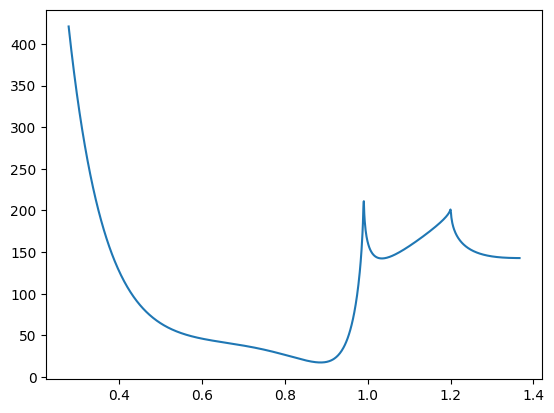

In [51]:
km_jordi_np_vals = [Kmatrix_jordi_np(v, g_poles_np, m_poles_np, b_poles_np, fprod1_np, fij_np, K_matrix_sprod_np, masses_poles) for v in xplsq]
km_jordi_np_dens = np.power(np.abs(km_jordi_np_vals),2)
plt.plot(xplsq, km_jordi_np_dens, label='ππ_np')

In [52]:
km  =KM(xplsq, m_poles, g_poles, s0, fij, b_poles, s0_prod, fprod1, masses_poles, mpi)

tf.Tensor(
[-0.23346867 +3.11367501j  2.60502496-10.83103836j
 29.10426211 -1.56115666j -3.75205495 -5.46805462j
  0.         +0.j        ], shape=(5,), dtype=complex128) tf.Tensor(
[[ 0.14466022  1.16951218  2.14875297  1.18495922  3.04076186]
 [ 0.14357188  1.16842384  2.14766463  1.18387088  3.03967353]
 [ 0.14248355  1.16733551  2.1465763   1.18278255  3.03858519]
 ...
 [-0.94041133  0.08444063  1.06368142  0.09988767  1.95569032]
 [-0.94149966  0.0833523   1.06259309  0.09879934  1.95460198]
 [-0.942588    0.08226396  1.06150475  0.097711    1.95351364]], shape=(1000, 5), dtype=float64)


In [53]:
masses_poles = [[mpi,mpi], [mkz, mkz], [mpi], [meta, meta], [meta, metap]]
km  =atfd.kmatrix_lineshapes(xplsq, m_poles, g_poles, s0, fij, b_poles, s0_prod, fi_prod, masses_poles, mpi)

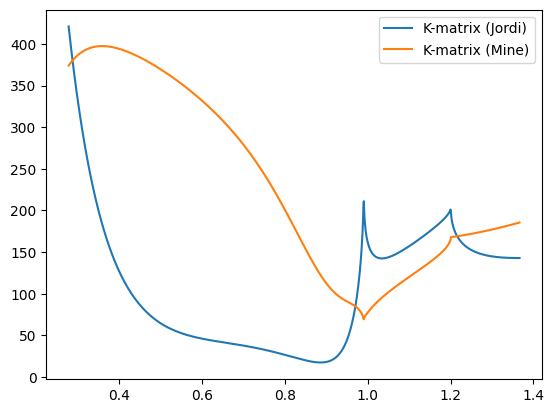

In [54]:
plt.plot(xplsq, km_jordi_np_dens, label='K-matrix (Jordi)')
plt.plot(xplsq, atfd.density(km[:, 0]), label='K-matrix (Mine)')
plt.legend()

One-to-one comparison with my model

In [55]:
def kmatrix_phsp_twobody_np(m2, ma, mb):
    r"""Calculates the phase space factor for the K-matrix in the case of two-body pole

    .. math::
        \sqrt{\left( 1 - \frac{(m_a + m_b)^2}{m^2} \right) \left( 1 - \frac{(m_a - m_b)^2}{m^2} \right)}

    Args:
        m2 (float): the invariant mass squared of the system
        ma (float): the mass of particle a
        mb (float): the mass of particle b

    Returns:
        complex: the phase space factor
    """
    km_phsp = np.lib.scimath.sqrt( (1.0 - np.power(ma+mb,2)/m2) * (1.0 - np.power(ma-mb,2)/m2) )
    return km_phsp

@atfi.function
def kmatrix_phsp_fourbody_np(m2, ma):
    r"""Calculates the phase space factor for the K-matrix in the case of two-body pole

    .. math::

        \rho(m) = \begin{cases}
                \sqrt{\frac{m^2-(4m_a^2)}{m^2}}, & \text{if }m\greq 1 GeV \\
                0.0005-0.0193m^2+0.1385m^4-0.2084m^6-0.2974m^8+0.1366m^{10}+1.0789m^{12} & \text{if }m<1 GeV
                \end{cases}

    where the second case is an approximation of the phase space factor for 4-body decays:

    .. math::

        \rho(m) = \rho_0\int\frac{dm_1^2}{\pi}\int\frac{dm_2^2}{\pi}\frac{M_0^2 \Gamma(m_1)\Gamma(m_2)\sqrt{(m^2+m_1^2-m_2^2)^2-4m^2m_1^2}}{m^2[(M_0^2-m_1^2)^2 + M_0^2\Gamma^2(m_1)][(M_0^2-m_2^2)^2 + M_0^2\Gamma^2(m_2)]}

    Args:
        m2 (float): the invariant mass squared of the system
        ma (float): the mass of particle a
        mb (float): the mass of particle b

    Returns:
        complex: the phase space factor
    """
    km_phsp = np.where(m2>1, np.lib.scimath.sqrt( (m2 - 16*ma*ma)/m2), 
                      	0.0005- 0.0193*m2 + 0.1385*m2*m2 - 0.2084*m2*m2*m2 - \
                      0.2974*m2*m2*m2*m2 + 0.1366*m2*m2*m2*m2*m2 + 1.0789*m2*m2*m2*m2*m2*m2) 
    return km_phsp


def Kmatrix_jordi_np2_phsp(s, masses_poles):
	rho1 = kmatrix_phsp_twobody_np(s, masses_poles[0][0], masses_poles[0][1])
	#
	rho2 = kmatrix_phsp_twobody_np(s, masses_poles[1][0], masses_poles[1][1])
	#
	rho3 = kmatrix_phsp_fourbody_np(s, masses_poles[2][0])
    #
	rho4 = kmatrix_phsp_twobody_np(s, masses_poles[3][0], masses_poles[3][1])
	#
	rho5 = kmatrix_phsp_twobody_np(s, masses_poles[4][0], masses_poles[4][1])
	rho = [rho1, rho2, rho3, rho4, rho5]
	return rho

def Kmatrix_resonant_np(s, g, ma):
	K = np.zeros([5,5],dtype=complex)
	for k in range(5):
		for l in range(5):
			for pole_index in range(5):
				A=g[pole_index][k]*g[pole_index][l]
				B=ma[pole_index]*ma[pole_index]-s
				K[k][l]=K[k][l]+complex(A/B,0.0)
	return K

def Kmatrix_nonresonant_np(s, fij, s_scatt):
	K = np.zeros([5,5],dtype=complex)
	for k in range(5):
		for l in range(5):
			C = fij[k][l]*(1.0-s_scatt)
			D = (s-s_scatt)
			K[k][l]=K[k][l]+complex(C/D,0.0)
	return K

def adler_zero_np(s, sa=1.0, sa_0=-0.15, mth=0.13957):
	K = np.ones([5,5],dtype=complex)
	for k in range(5):
		for l in range(5):
			E = (s-(sa*mth*mth*0.5))*(1.0-sa_0)
			F = (s-sa_0)
			K[k][l]=K[k][l]*complex(E/F,0.0)
	return K

def Kmatrix_transition_np(K, rho):
	# Compute the transition matrix
	N = I = np.identity(5,dtype=complex)
	for k in range(5):
		for l in range(5):
			N[k][l] = I[k][l] - complex(0.0, 1.0)*K[k][l]*rho[l]
	return N

def Kmatrix_resonant_prodvector_np(s,beta,g,ma,inverse_matrix):
	# Compute the product of the inverse matrix times the production vector
	value0 = complex(0,0)
	for l in range(5):
		for pole_index in range(5):
			A = beta[pole_index]*g[pole_index][l]
			B = ma[pole_index]*ma[pole_index]-s
			value0 += inverse_matrix[0][l] * A / B
	return value0

def Kmatrix_nonresonant_prodvector_np(s, s0prod, inverse_matrix, f_prod_1):
	value1 = complex(0,0)
	for l in range(5):
		value1 += inverse_matrix[0][l] * f_prod_1[l]
	value1 *= (1-s0prod)/(s-s0prod) 
	return value1

def Kmatrix_jordi_np2(s, g, ma, beta, f_prod_1, fij, K_matrix_sprod, masses_poles, mth=0.13957):
	# Define variables
	#atfi.complex pole,SVT,Adler
	i = np.zeros([5,5],dtype=complex)
	#f = tf.zeros([5,5], dtype=atfi.fptype())
	# pi+, K+, eta, and eta' PDG masses
	
	# Init matrices and vectors with zeros
	#K = np.zeros([5,5],dtype=complex)
	# Fill scattering data values 
	s_scatt = -3.92637
	sa = 1.0
	sa_0 = -0.15
	# Compute phase space factors
	rho = Kmatrix_jordi_np2_phsp(s, masses_poles)
	#print(rho)

	# Sum over the poles
	#print('K sum #1')
	K = Kmatrix_resonant_np(s, g, ma)
	#
	#print('K sum #2')
	K += Kmatrix_nonresonant_np(s, fij, s_scatt)
	#
	#print('K sum #3')
	K *= adler_zero_np(s, sa, sa_0, mth)
			#print(K[k][l])
	#
	N = Kmatrix_transition_np(K, rho)
	#
	# The 1st row of the inverse matrix {(I-iKp)^-1}_0j
	i = np.linalg.solve(N, np.identity(5,dtype=complex))
	
	# Compute inverse_matrix times first part of production vector, sum all the poles
	value0 = Kmatrix_resonant_prodvector_np(s,beta,g,ma,i)

	# Compute inverse_matrix times second part of production vector
	value1 = Kmatrix_nonresonant_prodvector_np(s, K_matrix_sprod, i, f_prod_1)

	# Compute final F0 vector
	F_0 = value0 + value1

	return F_0

In [56]:
km_jordi_np2_vals = [Kmatrix_jordi_np2(v, g_poles_np, m_poles_np, b_poles_np, fprod1_np, fij_np, K_matrix_sprod_np, masses_poles) for v in xplsq]
km_jordi_np2_dens = np.power(np.abs(km_jordi_np2_vals),2)

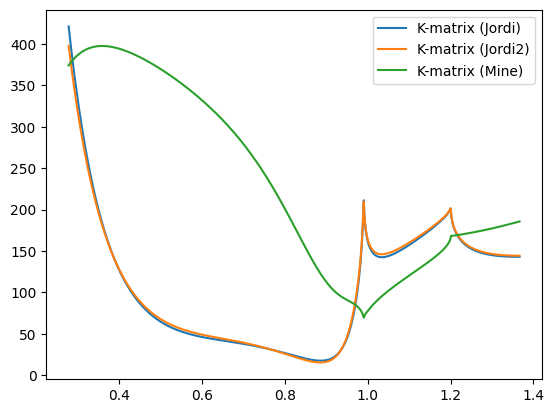

In [57]:
plt.plot(xplsq, km_jordi_np_dens, label='K-matrix (Jordi)')
plt.plot(xplsq, km_jordi_np2_dens, label='K-matrix (Jordi2)')
plt.plot(xplsq, atfd.density(km[:, 0]), label='K-matrix (Mine)')
plt.legend()

Compare phase space functions

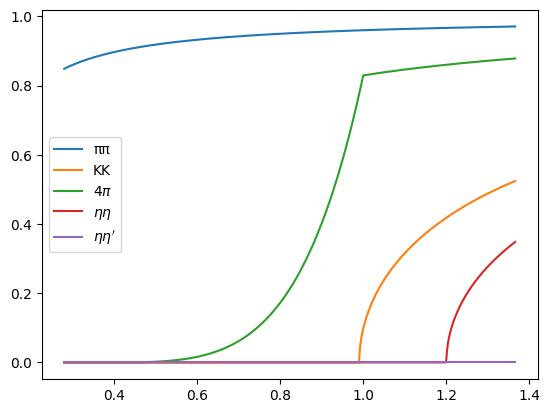

In [58]:
masses_poles = [[mpi,mpi], [mkz, mkz], [mpi], [meta, meta], [meta, metap]]
km_phsp = KM_phsp(xplsq, masses_poles )
#print(km_phsp)
plt.plot(xplsq, atfi.real(km_phsp[:, 0]), label='ππ')
plt.plot(xplsq, atfi.real(km_phsp[:, 1]), label='KK')
plt.plot(xplsq, atfi.real(km_phsp[:, 2]), label=r'$4\pi$')
plt.plot(xplsq, atfi.real(km_phsp[:, 3]), label=r'$\eta\eta$')
plt.plot(xplsq, atfi.real(km_phsp[:, 4]), label=r'$\eta\eta^\prime$')
plt.legend()

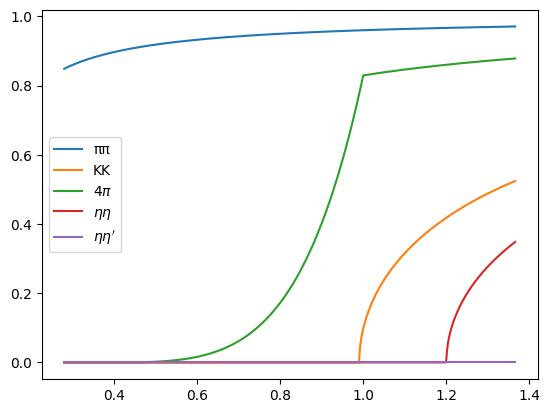

In [59]:
masses_poles = [[mpi,mpi], [mkz, mkz], [mpi], [meta, meta], [meta, metap]]
km_phsp_np = Kmatrix_jordi_np2_phsp(xplsq, masses_poles )
#print(km_phsp)
plt.plot(xplsq, np.real(km_phsp_np[0]), label='ππ')
plt.plot(xplsq, np.real(km_phsp_np[1]), label='KK')
plt.plot(xplsq, np.real(km_phsp_np[2]), label=r'$4\pi$')
plt.plot(xplsq, np.real(km_phsp_np[3]), label=r'$\eta\eta$')
plt.plot(xplsq, np.real(km_phsp_np[4]), label=r'$\eta\eta^\prime$')
plt.legend()

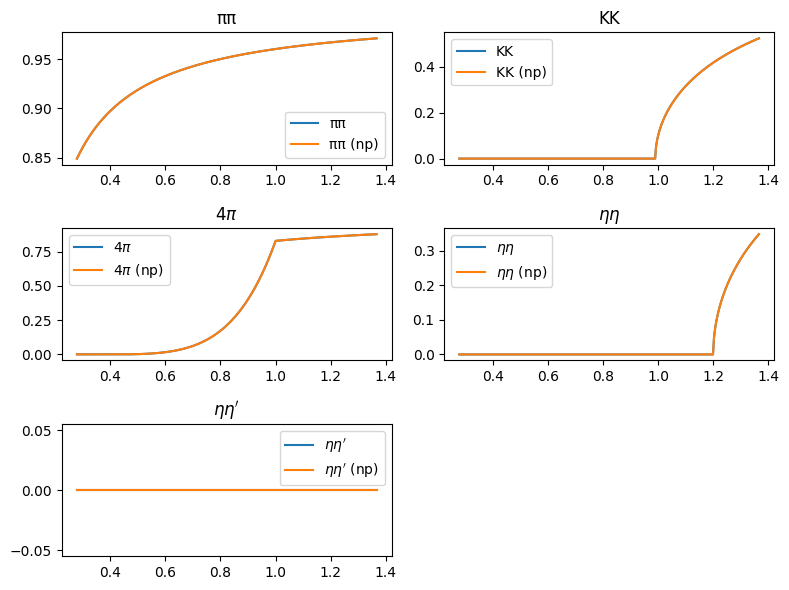

In [60]:
fig, ax = plt.subplots(3, 2, figsize=(8, 6))
ax[0, 0].plot(xplsq, atfi.real(km_phsp[:, 0]), label='ππ')
ax[0, 0].plot(xplsq, np.real(km_phsp_np[0]), label='ππ (np)')
ax[0, 0].set_title('ππ')
ax[0, 1].plot(xplsq, atfi.real(km_phsp[:, 1]), label='KK')
ax[0, 1].plot(xplsq, np.real(km_phsp_np[1]), label='KK (np)')
ax[0, 1].set_title('KK')
ax[1, 0].plot(xplsq, atfi.real(km_phsp[:, 2]), label=r'$4\pi$')
ax[1, 0].plot(xplsq, np.real(km_phsp_np[2]), label=r'$4\pi$ (np)')
ax[1, 0].set_title(r'$4\pi$')
ax[1, 1].plot(xplsq, atfi.real(km_phsp[:, 3]), label=r'$\eta\eta$')
ax[1, 1].plot(xplsq, np.real(km_phsp_np[3]), label=r'$\eta\eta$ (np)')
ax[1, 1].set_title(r'$\eta\eta$')
ax[2, 0].plot(xplsq, atfi.real(km_phsp[:, 4]), label=r'$\eta\eta^\prime$')
ax[2, 0].plot(xplsq, np.real(km_phsp_np[4]), label=r'$\eta\eta^\prime$ (np)')
ax[2, 0].set_title(r'$\eta\eta^\prime$')
ax[2, 1].axis('off')
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
ax[2, 0].legend()
plt.tight_layout()


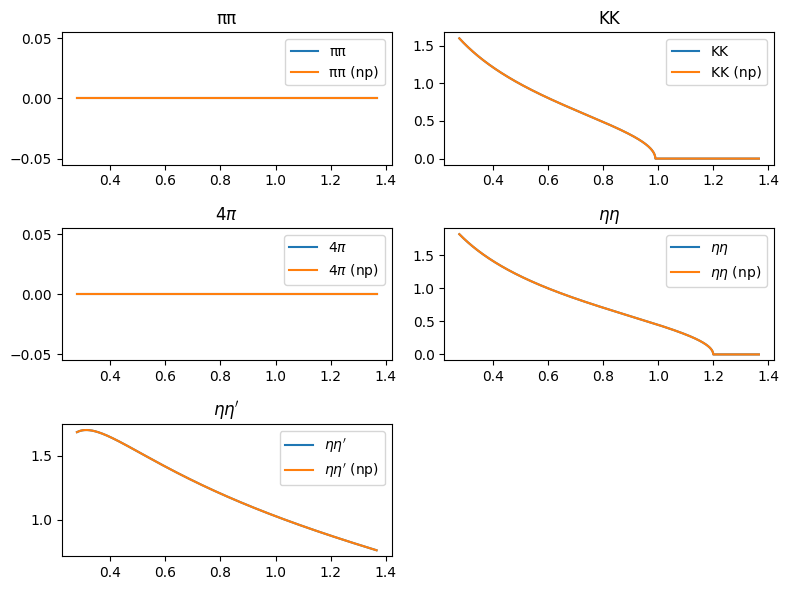

In [61]:
fig, ax = plt.subplots(3, 2, figsize=(8, 6))
ax[0, 0].plot(xplsq, atfi.imaginary(km_phsp[:, 0]), label='ππ')
ax[0, 0].plot(xplsq, np.imag(km_phsp_np[0]), label='ππ (np)')
ax[0, 0].set_title('ππ')
ax[0, 1].plot(xplsq, atfi.imaginary(km_phsp[:, 1]), label='KK')
ax[0, 1].plot(xplsq, np.imag(km_phsp_np[1]), label='KK (np)')
ax[0, 1].set_title('KK')
ax[1, 0].plot(xplsq, atfi.imaginary(km_phsp[:, 2]), label=r'$4\pi$')
ax[1, 0].plot(xplsq, np.imag(km_phsp_np[2]), label=r'$4\pi$ (np)')
ax[1, 0].set_title(r'$4\pi$')
ax[1, 1].plot(xplsq, atfi.imaginary(km_phsp[:, 3]), label=r'$\eta\eta$')
ax[1, 1].plot(xplsq, np.imag(km_phsp_np[3]), label=r'$\eta\eta$ (np)')
ax[1, 1].set_title(r'$\eta\eta$')
ax[2, 0].plot(xplsq, atfi.imaginary(km_phsp[:, 4]), label=r'$\eta\eta^\prime$')
ax[2, 0].plot(xplsq, np.imag(km_phsp_np[4]), label=r'$\eta\eta^\prime$ (np)')
ax[2, 0].set_title(r'$\eta\eta^\prime$')
ax[2, 1].axis('off')
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
ax[2, 0].legend()
plt.tight_layout()

Test the resonant part of the K-matrix

In [62]:
#g_poles_np, m_poles_np, b_poles_np, fprod1_np, fij_np, K_matrix_sprod_np, masses_poles
K_mat_res_np = [Kmatrix_resonant_np(v, g_poles_np, m_poles_np) for v in xplsq]
K_mat_res = atfd.resonant_kmatrix(xplsq, m_poles, g_poles) 

In [180]:
def matrix_diff(a,b):
    diff = np.zeros([5,5],dtype=complex)
    for i in range(5):
        for j in range(5):
            diff[i][j] = np.abs(a[i][j] - b[i][j])
    return diff

def compare_matrices(a,b):
    diff = np.zeros([5,5],dtype=complex)
    if a.ndim == 2:
        diff = matrix_diff(a, b)
    else:
        for i in range(len(a)):
            diff += matrix_diff(a[i], b[i])
    print(diff)
    print('Sum:', np.sum(diff))
    return diff

In [64]:
diff = np.zeros([5,5],dtype=complex)
for i in range(len(K_mat_res_np)):
    diff += matrix_diff(K_mat_res_np[i], K_mat_res[i])
print(diff)
print('Sum:', np.sum(diff))

/Users/mauriziomartinelli/environments/tfa/lib/python3.11/site-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


[[1.26265318e-13+0.j 3.45723450e-13+0.j 3.14748227e-14+0.j
  9.80604487e-14+0.j 1.77191595e-13+0.j]
 [3.45723450e-13+0.j 1.97855621e-13+0.j 3.78586051e-14+0.j
  1.23970278e-13+0.j 1.07198972e-13+0.j]
 [3.14748227e-14+0.j 3.78586051e-14+0.j 7.73825448e-14+0.j
  1.82631688e-14+0.j 5.44703171e-15+0.j]
 [9.80604487e-14+0.j 1.23970278e-13+0.j 1.82631688e-14+0.j
  1.40450152e-13+0.j 7.29225708e-14+0.j]
 [1.77191595e-13+0.j 1.07198972e-13+0.j 5.44703171e-15+0.j
  7.29225708e-14+0.j 1.00489062e-13+0.j]]
Sum: (2.6786645818122068e-12+0j)


In [65]:
K_mat_nonres_np = [Kmatrix_nonresonant_np(v, fij_np, -3.92637) for v in xplsq]
K_mat_nonres = atfd.nonresonant_kmatrix(xplsq, s0, fij)

In [66]:
diff = np.zeros([5,5],dtype=complex)
for i in range(len(xplsq)):
    diff += matrix_diff(K_mat_nonres_np[i], K_mat_nonres[i])
print(diff)
print('Sum:', np.sum(diff))

[[1.17961196e-14+0.j 9.71445147e-15+0.j 1.70974346e-14+0.j
  1.59317004e-14+0.j 2.53130850e-14+0.j]
 [9.71445147e-15+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [1.70974346e-14+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [1.59317004e-14+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [2.53130850e-14+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]]
Sum: (1.4790946245568648e-13+0j)


Test Adler zero

In [67]:
sa = 1.0
sa_0 = -0.15
adz_np = [adler_zero_np(v, sa, sa_0, 0.13957) for v in xplsq]
adz = atfd.adler_zero(xplsq, atfi.const(0.13957))

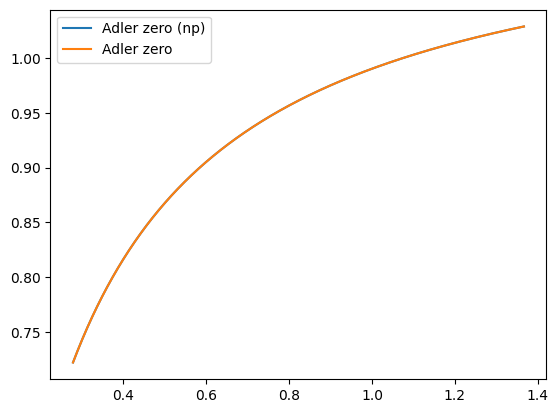

In [68]:
plt.plot(xplsq, np.real([matrix[0][0] for matrix in adz_np]), label='Adler zero (np)')
plt.plot(xplsq, adz, label='Adler zero')
plt.legend()

K-matrix with Adler zero

In [69]:
K_np = np.zeros([len(xplsq),5,5],dtype=complex)
for i in range(len(xplsq)):
	v = xplsq[i]
	K_np[i] = Kmatrix_resonant_np(v, g_poles_np, m_poles_np)
	K_np[i]+= Kmatrix_nonresonant_np(v, fij_np, -3.92637)
	K_np[i]*= adler_zero_np(v, sa, sa_0, 0.13957)

In [70]:
K_tf = K_mat_res + K_mat_nonres
K_tf = tf.einsum( 'k,kij->kij', adz, K_tf )

In [71]:
K_diff = compare_matrices(K_np,K_tf)

[[2.42798837e-13+0.j 4.57148208e-13+0.j 5.79258863e-14+0.j
  1.90982430e-13+0.j 2.59078457e-13+0.j]
 [4.57148208e-13+0.j 3.24971170e-13+0.j 7.57172103e-14+0.j
  2.12668316e-13+0.j 1.78015697e-13+0.j]
 [5.79258863e-14+0.j 7.57172103e-14+0.j 1.61426428e-13+0.j
  3.40005801e-14+0.j 5.81999726e-15+0.j]
 [1.90982430e-13+0.j 2.12668316e-13+0.j 3.40005801e-14+0.j
  1.46380100e-13+0.j 1.24973708e-13+0.j]
 [2.59078457e-13+0.j 1.78015697e-13+0.j 5.81999726e-15+0.j
  1.24973708e-13+0.j 1.06824055e-13+0.j]]
Sum: (4.175061568711426e-12+0j)


Transition matrix from K-matrix

In [72]:
N_np = [Kmatrix_transition_np(K_np[i], np.transpose(km_phsp_np)[i]) for i in range(len(xplsq))]
identity = tf.eye(5, dtype=atfi.ctype())
km_phsp_tf = tf.einsum('ki,ij->kij', km_phsp, identity)
# N_tf = identity - atfi.cast_complex(atfi.complex(0.0, 1.0)) * \
#                 tf.einsum('kij,kij->kij', km_phsp_tf, atfi.cast_complex(K_tf))
N_tf = identity - atfi.cast_complex(atfi.complex(0.0, 1.0)) * \
                tf.einsum('kij,kj->kij', atfi.cast_complex(K_tf), km_phsp)

In [73]:
N_diff = compare_matrices(N_np,N_tf)

[[2.29682592e-13+0.j 3.93476918e-13+0.j 3.33583475e-14+0.j
  1.78719452e-13+0.j 3.97525545e-13+0.j]
 [4.48474591e-13+0.j 3.10076617e-13+0.j 4.66313192e-14+0.j
  2.43988044e-13+0.j 2.80066226e-13+0.j]
 [5.54764568e-14+0.j 3.85837196e-14+0.j 9.13530429e-14+0.j
  1.78398962e-14+0.j 6.67521594e-15+0.j]
 [1.82911195e-13+0.j 2.24353278e-13+0.j 2.06071486e-14+0.j
  1.53418944e-13+0.j 1.93224668e-13+0.j]
 [2.54491849e-13+0.j 1.80124416e-13+0.j 2.69678817e-15+0.j
  1.64309755e-13+0.j 1.43107748e-13+0.j]]
Sum: (4.291173773217693e-12+0j)


inverted matrix

In [84]:
I = np.identity(5,dtype=complex)
invN_np = [np.linalg.solve(N_np[v], I) for v in range(len(xplsq))]
identity = tf.eye(5, batch_shape=[N_tf.shape[0]], dtype=atfi.ctype())
invN_tf = tf.linalg.solve(N_tf, identity)

In [86]:
invN_diff = compare_matrices(invN_np,invN_tf)

[[2.16872093e-13+0.j 1.67358559e-13+0.j 2.39290646e-14+0.j
  2.12440977e-13+0.j 2.83886875e-13+0.j]
 [3.34891571e-13+0.j 3.16698690e-13+0.j 4.45779548e-14+0.j
  3.59107028e-13+0.j 4.25894877e-13+0.j]
 [8.98992203e-14+0.j 1.09562315e-13+0.j 1.09923775e-13+0.j
  1.08387465e-13+0.j 1.33012436e-13+0.j]
 [3.02974208e-13+0.j 2.41884885e-13+0.j 3.21221753e-14+0.j
  3.81938188e-13+0.j 4.30072390e-13+0.j]
 [1.89084779e-13+0.j 2.30956394e-13+0.j 3.20888712e-14+0.j
  2.17528732e-13+0.j 4.02457334e-13+0.j]]
Sum: (5.397550855445939e-12+0j)


production vector

In [252]:
def Kmatrix_resonant_prodvector_np(s,beta,g,ma,inverse_matrix):
	# Compute the product of the inverse matrix times the production vector
	value0 = complex(0,0)
	print('Printing "inverse_matrix[0][l], A / B, inverse_matrix[0][l] * A / B"')
	for l in range(5):
		for pole_index in range(5):
			A = beta[pole_index]*g[pole_index][l]
			B = ma[pole_index]*ma[pole_index]-s
			print(inverse_matrix[0][l], A / B, inverse_matrix[0][l] * A / B)
			value0 += inverse_matrix[0][l] * A / B
	return value0

def Kmatrix_nonresonant_prodvector_np(s, s0prod, inverse_matrix, f_prod_1):
	value1 = complex(0,0)
	print(inverse_matrix[0])
	for l in range(5):
		value1 += inverse_matrix[0][l] * f_prod_1[l]
	value1 *= (1-s0prod)/(s-s0prod) 
	return value1

def Kmatrix_resonant_prodvector_tf(s,beta,g,ma,inverse_matrix):
	# Compute the product of the inverse matrix times the production vector
	# Vectorized TensorFlow implementation
	A = tf.einsum('p,pl->lp', beta, atfi.cast_complex(g))  # Compute A for all poles and l
	B = atfi.cast_complex(atfi.pow(ma,2) - tf.expand_dims(s, axis=-1))  # Compute B for all poles
	AoverB = tf.expand_dims(A, axis=0) / tf.expand_dims(B, axis=1)
	#value0 = tf.einsum('kj,kj->k', inverse_matrix[:, 0, :], tf.reduce_sum(A / tf.expand_dims(B, axis=1), axis=1) )
	value0 = tf.reduce_sum( tf.einsum('kl,klp->kp', inverse_matrix[:, :, 0], AoverB), axis=1) #somma tutti gli elementi
	return value0

In [253]:
K_pv_res_np = [Kmatrix_resonant_prodvector_np(v,b_poles_np,g_poles_np,m_poles_np,invN_np[i]) for i,v in enumerate(xplsq)]
K_pv_res_tf = Kmatrix_resonant_prodvector_tf(xplsq, b_poles, g_poles, m_poles, invN_tf)

Printing "inverse_matrix[0][l], A / B, inverse_matrix[0][l] * A / B"
(0.5431225226140638+0.4981363163529977j) (-0.3694080049626244+4.926641707366676j) (-2.6547729596278082+2.4917545292972556j)
(0.5431225226140638+0.4981363163529977j) (2.0966501588926216-8.717343832472103j) (5.481163468427116-3.6901681859547013j)
(0.5431225226140638+0.4981363163529977j) (4.992042826570395-0.26777387010089154j) (2.8446787822319988+2.3412838048848563j)
(0.5431225226140638+0.4981363163529977j) (-1.0654936208101617-1.5527963740803545j) (0.19481068266707147-1.3741197511644856j)
(0.5431225226140638+0.4981363163529977j) 0j 0j
(0.0957895837196019+0.08785169871288238j) (0.8937352916604153-11.919377772241882j) (1.1327481164356892-1.0632360714277047j)
(0.0957895837196019+0.08785169871288238j) (1.22721124961955-5.1024356031154445j) (0.5658116900438516-0.3809475894198677j)
(0.0957895837196019+0.08785169871288238j) (3.2355632472626867-0.1735560616716436j) (0.3251804513935078+0.26762486466545665j)
(0.0957895837196019+

In [254]:
K_pv_res_tf - K_pv_res_np

<tf.Tensor: shape=(1000,), dtype=complex128, numpy=
array([ 1.93977927e-01+3.88898757e-01j,  1.57836204e-01+3.93168901e-01j,
        1.21277797e-01+3.97278043e-01j,  8.42952003e-02+4.01224478e-01j,
        4.68806423e-02+4.05006456e-01j,  9.02607739e-03+4.08622185e-01j,
       -2.92768245e-02+4.12069821e-01j, -6.80366892e-02+4.15347473e-01j,
       -1.07262449e-01+4.18453199e-01j, -1.46963355e-01+4.21385000e-01j,
       -1.87148990e-01+4.24140822e-01j, -2.27829280e-01+4.26718552e-01j,
       -2.69014508e-01+4.29116013e-01j, -3.10715332e-01+4.31330964e-01j,
       -3.52942795e-01+4.33361096e-01j, -3.95708346e-01+4.35204028e-01j,
       -4.39023850e-01+4.36857304e-01j, -4.82901615e-01+4.38318393e-01j,
       -5.27354403e-01+4.39584680e-01j, -5.72395451e-01+4.40653464e-01j,
       -6.18038496e-01+4.41521957e-01j, -6.64297790e-01+4.42187276e-01j,
       -7.11188129e-01+4.42646440e-01j, -7.58724875e-01+4.42896366e-01j,
       -8.06923979e-01+4.42933865e-01j, -8.55802012e-01+4.42755632e-01j,

In [103]:
B = atfi.cast_complex(atfi.pow(m_poles,2) - tf.expand_dims(xplsq, axis=-1))
print(B)

tf.Tensor(
[[ 0.14466022+0.j  1.16951218+0.j  2.14875297+0.j  1.18495922+0.j
   3.04076186+0.j]
 [ 0.14357188+0.j  1.16842384+0.j  2.14766463+0.j  1.18387088+0.j
   3.03967353+0.j]
 [ 0.14248355+0.j  1.16733551+0.j  2.1465763 +0.j  1.18278255+0.j
   3.03858519+0.j]
 ...
 [-0.94041133+0.j  0.08444063+0.j  1.06368142+0.j  0.09988767+0.j
   1.95569032+0.j]
 [-0.94149966+0.j  0.0833523 +0.j  1.06259309+0.j  0.09879934+0.j
   1.95460198+0.j]
 [-0.942588  +0.j  0.08226396+0.j  1.06150475+0.j  0.097711  +0.j
   1.95351364+0.j]], shape=(1000, 5), dtype=complex128)


In [104]:
A = tf.einsum('p,pl->pl', b_poles, atfi.cast_complex(g_poles))
print(A)

tf.Tensor(
[[-0.05343864 +0.71268907j  0.12928794 -1.72425981j
  -0.         +0.j          0.09315166 -1.24232519j
   0.08087121 -1.07854589j]
 [ 2.4520579 -10.19503979j  1.4352385  -5.96736059j
   0.         +0.j          1.017653   -4.23114514j
   0.82066101 -3.41210202j]
 [10.72666684 -0.5753799j   6.95242613 -0.3729291j
  16.1933204  -0.86861195j  5.33772167 -0.28631613j
   5.43696721 -0.29163968j]
 [-1.26256649 -1.84000038j -1.53485312 -2.2368171j
  -3.21472316 -4.68497452j -0.74688406 -1.08847095j
   0.03692022 +0.05380566j]
 [ 0.         +0.j         -0.         +0.j
  -0.         +0.j         -0.         +0.j
   0.         +0.j        ]], shape=(5, 5), dtype=complex128)


In [112]:
tf.reduce_sum(A / tf.expand_dims(B, axis=1), axis=1)

<tf.Tensor: shape=(1000, 5), dtype=complex128, numpy=
array([[ 82.00402024 -82.24604521j,   5.97009555  -8.80825936j,
          6.04006018  -2.58456256j,   4.81167806  -5.77931907j,
          2.09665207  -1.55503197j],
       [ 82.62564595 -82.86950557j,   5.97565644  -8.81646387j,
          6.043121    -2.5858723j ,   4.81610145  -5.78463201j,
          2.09740276  -1.55558874j],
       [ 83.25676802 -83.50249032j,   5.9812277   -8.82468369j,
          6.04618492  -2.58718336j,   4.82053298  -5.78995474j,
          2.09815399  -1.55614591j],
       ...,
       [-12.61439465 +12.65162451j,  82.6864888 -121.99537383j,
         12.20158308  -5.22109944j,  57.08053959 -68.55958498j,
          3.25993313  -2.41780709j],
       [-12.5998129  +12.63699973j,  83.76613186-123.58827565j,
         12.21408027  -5.22644703j,  57.70931747 -69.31481174j,
          3.26174828  -2.41915335j],
       [-12.58526483 +12.62240872j,  84.87434186-125.22332505j,
         12.22660309  -5.23180558j,  58.35210

In [ ]:
tf.einsum('kij,kj->ki', invN_tf, tf.reduce_sum(A / tf.expand_dims(B, axis=1), axis=1) )

#tf.reduce_sum(inverse_matrix[0, :] * tf.reduce_sum(A / tf.expand_dims(B, axis=1), axis=1))

<tf.Tensor: shape=(1000, 5), dtype=complex128, numpy=
array([[ 85.72353004  -4.05352387j,   0.65888374 -10.40566678j,
          5.43474842  +3.84351278j,   1.64186602  +4.91378131j,
         -0.4350764   +8.2807217j ],
       [ 86.20438277  -3.86708494j,   0.67163703 -10.51810536j,
          5.43087476  +3.9293527j ,   1.62616482  +4.92012105j,
         -0.45423056  +8.28692301j],
       [ 86.69162668  -3.6789692j ,   0.6848086  -10.63221831j,
          5.42667107  +4.01649341j,   1.61043701  +4.92619052j,
         -0.47340124  +8.29280012j],
       ...,
       [ -3.87549965 +51.75921303j,  21.52267309-100.65574775j,
         -2.1966892  +14.37754179j,   4.92885401 -56.3036467j ,
        -40.4439309   +3.16023555j],
       [ -3.89851488 +52.41743449j,  21.81193108-101.83858356j,
         -2.28139043 +14.50734397j,   4.87865353 -56.78972407j,
        -41.02384614  +3.34136006j],
       [ -3.92297786 +53.09214114j,  22.10964456-103.05379819j,
         -2.36765445 +14.64080412j,   4.82513

In [119]:
tf.reduce_sum(A / tf.expand_dims(B, axis=1), axis=1).shape

TensorShape([1000, 5])

In [145]:
invN_tf[:, 0, :]

<tf.Tensor: shape=(1000, 5), dtype=complex128, numpy=
array([[ 5.43122523e-01+4.98136316e-01j,  9.57895837e-02+8.78516987e-02j,
        -1.04465498e-05+1.13854383e-05j, -8.42835085e-02-7.73030313e-02j,
        -7.88569929e-02-7.23216441e-02j],
       [ 5.40708340e-01+4.98339406e-01j,  9.58301033e-02+8.83172638e-02j,
        -1.05127607e-05+1.14020378e-05j, -8.32402988e-02-7.67183690e-02j,
        -7.80826559e-02-7.19604896e-02j],
       [ 5.38297386e-01+4.98530475e-01j,  9.58678936e-02+8.87818362e-02j,
        -1.05741136e-05+1.14130848e-05j, -8.22025216e-02-7.61304139e-02j,
        -7.73051768e-02-7.15904473e-02j],
       ...,
       [ 2.46122027e-01+7.33216972e-03j, -2.13255689e-01+1.46309706e-01j,
         1.99104522e-02-9.54833643e-02j, -1.00521071e-01+8.96989896e-02j,
        -1.90362326e-01-1.77669083e-01j],
       [ 2.45829021e-01+6.51526153e-03j, -2.13459436e-01+1.46078639e-01j,
         2.02826951e-02-9.51442717e-02j, -1.00759847e-01+8.97446541e-02j,
        -1.89729689e-01-1.

In [150]:
np.shape(invN_np)

(1000, 5, 5)

In [156]:
np.array(invN_np)[:, 0, :]

array([[ 5.43122523e-01+4.98136316e-01j,  9.57895837e-02+8.78516987e-02j,
        -1.04465498e-05+1.13854383e-05j, -8.42835085e-02-7.73030313e-02j,
        -7.88569929e-02-7.23216441e-02j],
       [ 5.40708340e-01+4.98339406e-01j,  9.58301033e-02+8.83172638e-02j,
        -1.05127607e-05+1.14020378e-05j, -8.32402988e-02-7.67183690e-02j,
        -7.80826559e-02-7.19604896e-02j],
       [ 5.38297386e-01+4.98530475e-01j,  9.58678936e-02+8.87818362e-02j,
        -1.05741136e-05+1.14130848e-05j, -8.22025216e-02-7.61304139e-02j,
        -7.73051768e-02-7.15904473e-02j],
       ...,
       [ 2.46122027e-01+7.33216972e-03j, -2.13255689e-01+1.46309706e-01j,
         1.99104522e-02-9.54833643e-02j, -1.00521071e-01+8.96989896e-02j,
        -1.90362326e-01-1.77669083e-01j],
       [ 2.45829021e-01+6.51526153e-03j, -2.13459436e-01+1.46078639e-01j,
         2.02826951e-02-9.51442717e-02j, -1.00759847e-01+8.97446541e-02j,
        -1.89729689e-01-1.77412065e-01j],
       [ 2.45538068e-01+5.69794725e-03

A matrix

In [183]:
def test_A(beta,g):
	A = np.zeros([5,5],dtype=complex)
	for l in range(5):
		for pole_index in range(5):
			A[l][pole_index] = beta[pole_index]*g[pole_index][l]
			#B = ma[pole_index]*ma[pole_index]-s
	return A
A_np = test_A(b_poles_np, g_poles_np)
#print(A_np)
A_tf = tf.einsum('p,pl->lp', b_poles, atfi.cast_complex(g_poles))
#print(A_tf)
diff_A = compare_matrices(A_np, A_tf)
#print(diff_A)
#print(A_tf)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Sum: 0j


In [188]:
def test_AoverB(s,beta,g,ma):
	AoverB = np.zeros([5,5],dtype=complex)
	for l in range(5):
		for pole_index in range(5):
			A = beta[pole_index]*g[pole_index][l]
			B = ma[pole_index]*ma[pole_index]-s
			AoverB[l][pole_index] = A / B
	return AoverB
AoverB_np = test_AoverB(xplsq[0], b_poles_np, g_poles_np, m_poles_np)
AoverB_tf = tf.einsum('p,pl->lp', b_poles, atfi.cast_complex(g_poles)) / tf.expand_dims(atfi.cast_complex(atfi.pow(m_poles,2) - tf.expand_dims(xplsq[0], axis=-1)), axis=0)
diff_AoverB = compare_matrices(AoverB_np, AoverB_tf)

[[5.55111512e-17+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [1.77635684e-15+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  4.44089210e-16+0.j 0.00000000e+00+0.j]
 [1.77982290e-15+0.j 4.44089210e-16+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j]]
Sum: (4.499869315153382e-15+0j)


In [210]:
tf.reduce_sum(AoverB_tf, axis=1)

<tf.Tensor: shape=(1000, 5), dtype=complex128, numpy=
array([[  1.72730399 -23.03633865j,   4.89572534 -20.35519419j,
         20.7781457   -1.11454262j,  -5.67285902  -8.26733708j,
          0.          +0.j        ],
       [  1.7403977  -23.21096399j,   4.9002855  -20.37415417j,
         20.78867509  -1.11510742j,  -5.6780741   -8.27493727j,
          0.          +0.j        ],
       [  1.75369144 -23.38825703j,   4.90485416 -20.39314951j,
         20.79921517  -1.11567279j,  -5.68329878  -8.28255145j,
          0.          +0.j        ],
       ...,
       [ -0.2657052   +3.54360025j,  67.80634165-281.92170817j,
         41.97412997  -2.25149816j, -67.29665827 -98.07473729j,
          0.          +0.j        ],
       [ -0.26539805  +3.53950399j,  68.69169363-285.60277892j,
         42.01712101  -2.2538042j , -68.0379731  -99.15509194j,
          0.          +0.j        ],
       [ -0.26509162  +3.53541719j,  69.60047168-289.38124941j,
         42.0602002   -2.25611498j, -68.79580

In [250]:
Kmatrix_resonant_prodvector_np(xplsq[0],b_poles_np,g_poles_np,m_poles_np,invN_np[0])

Printing "inverse_matrix[0][l], A / B, inverse_matrix[0][l] * A / B"
(0.5431225226140638+0.4981363163529977j) (-0.3694080049626244+4.926641707366676j) (-2.6547729596278082+2.4917545292972556j)
(0.5431225226140638+0.4981363163529977j) (2.0966501588926216-8.717343832472103j) (5.481163468427116-3.6901681859547013j)
(0.5431225226140638+0.4981363163529977j) (4.992042826570395-0.26777387010089154j) (2.8446787822319988+2.3412838048848563j)
(0.5431225226140638+0.4981363163529977j) (-1.0654936208101617-1.5527963740803545j) (0.19481068266707147-1.3741197511644856j)
(0.5431225226140638+0.4981363163529977j) 0j 0j
(0.0957895837196019+0.08785169871288238j) (0.8937352916604153-11.919377772241882j) (1.1327481164356892-1.0632360714277047j)
(0.0957895837196019+0.08785169871288238j) (1.22721124961955-5.1024356031154445j) (0.5658116900438516-0.3809475894198677j)
(0.0957895837196019+0.08785169871288238j) (3.2355632472626867-0.1735560616716436j) (0.3251804513935078+0.26762486466545665j)
(0.0957895837196019+

(5.564522083891272-0.29657414249599207j)

Code for `Kmatrix_resonant_prodvector_np`:

```
def Kmatrix_resonant_prodvector_np(s,beta,g,ma,inverse_matrix):
	# Compute the product of the inverse matrix times the production vector
	value0 = complex(0,0)
	for l in range(5):
		for pole_index in range(5):
			A = beta[pole_index]*g[pole_index][l]
			B = ma[pole_index]*ma[pole_index]-s
			value0 += inverse_matrix[0][l] * A / B
	return value0
```

That is 
$$
v = \sum_l(A/B)_{lp}N_{l0}
$$

In [244]:
v = tf.einsum('kl,klp->kp', invN_tf[:, :, 0], AoverB_tf)

In [245]:
v[0]

<tf.Tensor: shape=(5,), dtype=complex128, numpy=
array([-2.62918798+2.51902664j,  5.48004025-3.69182873j,
        2.61124915+2.62479962j,  0.29639858-1.35967291j,
        0.        +0.j        ])>

In [231]:
invN_tf[0, 0, :]

<tf.Tensor: shape=(5,), dtype=complex128, numpy=
array([ 5.43122523e-01+4.98136316e-01j,  9.57895837e-02+8.78516987e-02j,
       -1.04465498e-05+1.13854383e-05j, -8.42835085e-02-7.73030313e-02j,
       -7.88569929e-02-7.23216441e-02j])>

In [248]:
AoverB_tf[0, 0, :]

<tf.Tensor: shape=(5,), dtype=complex128, numpy=
array([-0.369408  +4.92664171j,  2.09665016-8.71734383j,
        4.99204283-0.26777387j, -1.06549362-1.55279637j,
        0.        +0.j        ])>

In [251]:
tf.reduce_sum(v, axis=1)

<tf.Tensor: shape=(1000,), dtype=complex128, numpy=
array([ 5.75850001e+00+9.23246146e-02j,  5.72225544e+00+1.10049928e-01j,
        5.68555796e+00+1.27596711e-01j,  5.64839987e+00+1.44963329e-01j,
        5.61077322e+00+1.62148101e-01j,  5.57266980e+00+1.79149299e-01j,
        5.53408111e+00+1.95965146e-01j,  5.49499836e+00+2.12593814e-01j,
        5.45541246e+00+2.29033419e-01j,  5.41531399e+00+2.45282022e-01j,
        5.37469324e+00+2.61337625e-01j,  5.33354013e+00+2.77198170e-01j,
        5.29184423e+00+2.92861532e-01j,  5.24959476e+00+3.08325522e-01j,
        5.20678052e+00+3.23587879e-01j,  5.16338996e+00+3.38646271e-01j,
        5.11941106e+00+3.53498290e-01j,  5.07483141e+00+3.68141445e-01j,
        5.02963811e+00+3.82573166e-01j,  4.98381782e+00+3.96790795e-01j,
        4.93735669e+00+4.10791581e-01j,  4.89024035e+00+4.24572681e-01j,
        4.84245389e+00+4.38131150e-01j,  4.79398186e+00+4.51463942e-01j,
        4.74480819e+00+4.64567899e-01j,  4.69491621e+00+4.77439751e-01j,